# **Detection of Epidermal Growth Factor Receptor Mutation (EGFR) in Lung Cancer Using Extreme Gradient Boosting (XGBoost)**
---

## **About The Data**  
1. **No**: Patient identification.  
2. **Name**: Patient's name.  
3. **Gender**: Patient's gender.  
4. **Age**: Patient's age.  
5. **Test Number**: Examination number.  
6. **Test Result**: Type of lung cancer.  
7. **EGFR Mutation**: EGFR mutation status.  
8. **Dimension**: Tumor size.  
   - 1 = Greater than 3 cm  
   - 0 = Less than 3 cm  
9. **Density**: Tumor density.  
   - 1 = Solid  
   - 0 = Non-solid  
10. **Edge**: Tumor edge characteristics.  
    - 1 = Spiculated (spiky or pointed)  
    - 0 = Non-spiculated  
11. **Indentation**: Appearance of blood vessel lines leading to the tumor.  
    - 1 = Positive  
    - 0 = Negative  
12. **Cavity**: Presence of cavities within the tumor.  
    - 1 = Positive  
    - 0 = Negative  
13. **Necrosis**: Tissue death within the tumor.  
    - 1 = Positive  
    - 0 = Negative  
14. **Calcification**: Calcium deposits in the tumor.  
    - 1 = Positive  
    - 0 = Negative  
15. **Tumor Location**: Position of the tumor in the lung.  
    - 1 = Central  
    - 2 = Peripheral  
    - 3 = Central and Peripheral  
16. **Lobe Location**: Lung lobe affected by the tumor.  
    - 1 = Right Upper Lobe  
    - 2 = Right Middle Lobe  
    - 3 = Right Lower Lobe  
    - 4 = Left Upper Lobe  
    - 5 = Left Lower Lobe  
17. **Emphysema Type**: Type of alveolar damage in the lung.  
    - 1 = Centrilobular  
    - 2 = Paraseptal  
    - 3 = Panlobular  
    - 0 = Negative  
18. **Emphysema Location**: Lung lobe affected by emphysema.  
    - 1 = Right Upper Lobe  
    - 2 = Right Middle Lobe  
    - 3 = Right Lower Lobe  
    - 4 = Left Upper Lobe  
    - 5 = Left Lower Lobe  
    - 0 = Negative  
19. **Emphysema Lobe**: Number of lobes affected by emphysema.  
    - 1-5 = Number of lobes  
    - 0 = Negative  
20. **Lymphadenopathy**: Enlargement of lymph nodes.  
    - 1 = Right Hilum  
    - 2 = Left Hilum  
    - 3 = Subcarinal  
    - 4 = Aortic Window  
    - 5 = Right Paratracheal  
    - 6 = Left Paratracheal  
    - 7 = Prevascular  
    - 8 = Infraclavicular  
    - 9 = Supraclavicular  
    - 0 = Negative  
21. **Pulmonary Nodule**: Lumps in the lungs.  
    - 1 = Right Lung  
    - 2 = Left Lung  
    - 0 = Negative  
22. **Pleural Effusion**: Fluid in the pleura.  
    - 1 = Right  
    - 2 = Left  
    - 0 = Negative  
23. **Pericardial Effusion**: Fluid in the pericardium.  
    - 1 = Positive  
    - 0 = Negative  
24. **Bone Metastasis**: Cancer spread to the bone.  
    - 1 = Lytic  
    - 2 = Blastic  
    - 3 = Lytic Blastic  
    - 0 = Negative  
25. **Liver Metastasis**: Cancer spread to the liver.  
    - 1 = Positive  
    - 0 = Negative  
26. **Spleen Metastasis**: Cancer spread to the spleen.  
    - 1 = Positive  
    - 0 = Negative  
27. **Suprarenal Metastasis**: Cancer spread to the adrenal glands.  
    - 1 = Right  
    - 2 = Left  
    - 0 = Negative  
28. **Staging**: Cancer stage classification.

## **Data Understanding**

### **Import Library**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, cross_validate, StratifiedShuffleSplit

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, make_scorer

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import Dataset**

In [53]:
df = pd.read_csv('/content/drive/MyDrive/Skripsi/EGFR Mutation in Lung Cancer Dataset.csv')
df.head()

No           Name Gender   Age    Test Number              Test Result  \
0   1    Abdul Munif      M  75.0  FNA/1012/2018                      NaN   
1   2          Amrun      M  76.0      gf.112.18                      NaN   
2   3  Andy Budianto      M  68.0            NaN                      NaN   
3   4         Asmuri      M  67.0    M/3218/2018  Squamous Cell Carcinoma   
4   5      Bambang S      M   NaN  fna/2014/2018           Adenocarcinoma   

  EGFR Mutation  Dimension  Density  Edge  ...  Emphysema Lobe  \
0      Negative        1.0      1.0   1.0  ...             2.0   
1      Positive        1.0      1.0   1.0  ...             0.0   
2      Negative        1.0      1.0   1.0  ...             5.0   
3      Negative        1.0      1.0   1.0  ...             5.0   
4      Negative        1.0      1.0   0.0  ...             1.0   

   Lymphadenopathy  Pulmonary Nodule  Pleural Effusion  Pericardial Effusion  \
0        1 2 3 5 6                 1                 2                   0.0   
1                1                 0                 0                   0.0   
2             3 5                  0                 0                   0.0   
3         1 3 5 6                1 2                 0                   0.0   
4            1 2 6                 0                 0                   0.0   

  Bone Metastasis Liver Metastasis Spleen Metastasis  Suprarenal Metastasis  \
0             0.0              1.0               0.0                    0.0   
1             0.0              0.0               0.0                    0.0   
2             1.0              0.0               0.0                    0.0   
3             0.0              1.0               0.0                    0.0   
4             0.0              0.0               1.0                    0.0   

  Staging  
0     IVb  
1     IIb  
2     IVb  
3     IVb  
4     IVa  

[5 rows x 28 columns]

### **Number of Rows Columns**

In [54]:
print("Number of rows =", df.shape[0])
print("Number of columns =", df.shape[1])

Number of rows = 80
Number of columns = 28


### **Class Distribution**

In [55]:
print(f"Class distribution: {Counter(df['EGFR Mutation'])}")

Class distribution: Counter({'Negative': 45, 'Positive': 35})


### **Dataset Information**

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   No                     80 non-null     int64  
 1   Name                   80 non-null     object 
 2   Gender                 80 non-null     object 
 3   Age                    76 non-null     float64
 4   Test Number            69 non-null     object 
 5   Test Result            51 non-null     object 
 6   EGFR Mutation          80 non-null     object 
 7   Dimension              76 non-null     float64
 8   Density                76 non-null     float64
 9   Edge                   76 non-null     float64
 10  Indentation            76 non-null     float64
 11  Cavity                 76 non-null     float64
 12  Necrosis               76 non-null     float64
 13  Calcification          76 non-null     float64
 14  Tumor Location         76 non-null     float64
 15  Lobe Loc

### **Descriptive Statistics**

**Numerical Column**

In [57]:
df.describe()

No        Age  Dimension    Density       Edge  Indentation  \
count  80.0000  76.000000  76.000000  76.000000  76.000000    76.000000   
mean   40.5000  58.013158   0.947368   0.986842   0.644737     0.973684   
std    23.2379  11.570645   0.224781   0.114708   0.481773     0.161136   
min     1.0000  33.000000   0.000000   0.000000   0.000000     0.000000   
25%    20.7500  50.500000   1.000000   1.000000   0.000000     1.000000   
50%    40.5000  58.000000   1.000000   1.000000   1.000000     1.000000   
75%    60.2500  67.000000   1.000000   1.000000   1.000000     1.000000   
max    80.0000  79.000000   1.000000   1.000000   1.000000     1.000000   

          Cavity   Necrosis  Calcification  Tumor Location  Emphysema Lobe  \
count  76.000000  76.000000      76.000000       76.000000       76.000000   
mean    0.118421   0.907895       0.289474        2.026316        0.907895   
std     0.325253   0.291096       0.456532        0.923381        1.515939   
min     0.000000   0.000000       0.000000        1.000000        0.000000   
25%     0.000000   1.000000       0.000000        1.000000        0.000000   
50%     0.000000   1.000000       0.000000        2.000000        0.000000   
75%     0.000000   1.000000       1.000000        3.000000        1.250000   
max     1.000000   1.000000       1.000000        3.000000        5.000000   

       Pericardial Effusion  Bone Metastasis  Liver Metastasis  \
count             76.000000        76.000000         76.000000   
mean               0.065789         0.802632          0.197368   
std                0.249561         1.083448          0.400657   
min                0.000000         0.000000          0.000000   
25%                0.000000         0.000000          0.000000   
50%                0.000000         0.000000          0.000000   
75%                0.000000         2.000000          0.000000   
max                1.000000         3.000000          1.000000   

       Spleen Metastasis  Suprarenal Metastasis  
count          76.000000              76.000000  
mean            0.013158               0.026316  
std             0.114708               0.161136  
min             0.000000               0.000000  
25%             0.000000               0.000000  
50%             0.000000               0.000000  
75%             0.000000               0.000000  
max             1.000000               1.000000

**Categorical Column**

In [58]:
df.describe(include='object')

Name Gender    Test Number     Test Result EGFR Mutation  \
count            80     80             69              51            80   
unique           80      2             69               3             2   
top     Abdul Munif      M  FNA/1012/2018  Adenocarcinoma      Negative   
freq              1     47              1              40            45   

       Lobe Location Emphysema Type Emphysema Location Lymphadenopathy  \
count             75             76                 76              76   
unique            10              6                 13              31   
top                1              0                  0               0   
freq              16             49                 49              15   

       Pulmonary Nodule Pleural Effusion Staging  
count                76               76      75  
unique                4                4       8  
top                   0                0     IVb  
freq                 30               42      39

### **Duplicated Data**

In [59]:
print("Number of duplicate data in the dataset:", df.duplicated().sum())

Number of duplicate data in the dataset: 0


There is no duplicate data.

### **Missing Value**

In [60]:
df.isna().sum()

No                        0
Name                      0
Gender                    0
Age                       4
Test Number              11
Test Result              29
EGFR Mutation             0
Dimension                 4
Density                   4
Edge                      4
Indentation               4
Cavity                    4
Necrosis                  4
Calcification             4
Tumor Location            4
Lobe Location             5
Emphysema Type            4
Emphysema Location        4
Emphysema Lobe            4
Lymphadenopathy           4
Pulmonary Nodule          4
Pleural Effusion          4
Pericardial Effusion      4
Bone Metastasis           4
Liver Metastasis          4
Spleen Metastasis         4
Suprarenal Metastasis     4
Staging                   5
dtype: int64

There are 4 patients with incomplete data that need to be removed. Missing values are found in the columns Age, Test Number, Test Result, Lobe Location, and Staging. The columns Number and Test Number can be dropped, while the columns Age, Test Result, Lobe Location, and Staging can be imputed.

## **Data Preprocessing**

### **Drop No and Test Number**

In [61]:
df = df.drop(['No', 'Test Number'], axis=1)
df.head()

Name Gender   Age              Test Result EGFR Mutation  \
0    Abdul Munif      M  75.0                      NaN      Negative   
1          Amrun      M  76.0                      NaN      Positive   
2  Andy Budianto      M  68.0                      NaN      Negative   
3         Asmuri      M  67.0  Squamous Cell Carcinoma      Negative   
4      Bambang S      M   NaN           Adenocarcinoma      Negative   

   Dimension  Density  Edge  Indentation  Cavity  ...  Emphysema Lobe  \
0        1.0      1.0   1.0          1.0     0.0  ...             2.0   
1        1.0      1.0   1.0          1.0     0.0  ...             0.0   
2        1.0      1.0   1.0          1.0     1.0  ...             5.0   
3        1.0      1.0   1.0          1.0     0.0  ...             5.0   
4        1.0      1.0   0.0          1.0     0.0  ...             1.0   

   Lymphadenopathy  Pulmonary Nodule Pleural Effusion Pericardial Effusion  \
0        1 2 3 5 6                 1                2                  0.0   
1                1                 0                0                  0.0   
2             3 5                  0                0                  0.0   
3         1 3 5 6                1 2                0                  0.0   
4            1 2 6                 0                0                  0.0   

  Bone Metastasis  Liver Metastasis Spleen Metastasis Suprarenal Metastasis  \
0             0.0               1.0               0.0                   0.0   
1             0.0               0.0               0.0                   0.0   
2             1.0               0.0               0.0                   0.0   
3             0.0               1.0               0.0                   0.0   
4             0.0               0.0               1.0                   0.0   

  Staging  
0     IVb  
1     IIb  
2     IVb  
3     IVb  
4     IVa  

[5 rows x 26 columns]

### **Drop Missing Value**

In [62]:
df = df.dropna(subset='Dimension')
df.isna().sum()

Name                      0
Gender                    0
Age                       3
Test Result              28
EGFR Mutation             0
Dimension                 0
Density                   0
Edge                      0
Indentation               0
Cavity                    0
Necrosis                  0
Calcification             0
Tumor Location            0
Lobe Location             1
Emphysema Type            0
Emphysema Location        0
Emphysema Lobe            0
Lymphadenopathy           0
Pulmonary Nodule          0
Pleural Effusion          0
Pericardial Effusion      0
Bone Metastasis           0
Liver Metastasis          0
Spleen Metastasis         0
Suprarenal Metastasis     0
Staging                   1
dtype: int64

### **Input Missing Value**

In [63]:
knn_imputer = KNNImputer(n_neighbors=2)
simple_imputer = SimpleImputer(strategy='most_frequent')

df_input = df.copy()
df_input['Age'] = knn_imputer.fit_transform(df_input[['Age']])
df_input[['Test Result', 'Staging', 'Lobe Location']] = simple_imputer.fit_transform(df_input[['Test Result', 'Staging', 'Lobe Location']])
df_input.isna().sum()

Name                     0
Gender                   0
Age                      0
Test Result              0
EGFR Mutation            0
Dimension                0
Density                  0
Edge                     0
Indentation              0
Cavity                   0
Necrosis                 0
Calcification            0
Tumor Location           0
Lobe Location            0
Emphysema Type           0
Emphysema Location       0
Emphysema Lobe           0
Lymphadenopathy          0
Pulmonary Nodule         0
Pleural Effusion         0
Pericardial Effusion     0
Bone Metastasis          0
Liver Metastasis         0
Spleen Metastasis        0
Suprarenal Metastasis    0
Staging                  0
dtype: int64

### **Remove Outlier**

In [64]:
def remove_outlier(df, columns):
    cleaned_df = df.copy()

    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]

    return cleaned_df

num_columns = df_input.select_dtypes(include=['float64', 'int64']).columns.tolist()
df_input = remove_outlier(df_input, num_columns)
df_input.head()

Name Gender        Age     Test Result EGFR Mutation  Dimension  \
5       Dai      M  58.356164  Adenocarcinoma      Negative        1.0   
6     Denok      F  51.000000  Adenocarcinoma      Negative        1.0   
8     Erwin      M  56.000000  Adenocarcinoma      Positive        1.0   
15  Hartono      M  37.000000  Adenocarcinoma      Negative        1.0   
17  Izzudin      M  53.000000  Adenocarcinoma      Negative        1.0   

    Density  Edge  Indentation  Cavity  ...  Emphysema Lobe  Lymphadenopathy  \
5       1.0   1.0          1.0     0.0  ...             0.0    1 2 3 4 5 6 7   
6       1.0   0.0          1.0     0.0  ...             0.0                0   
8       1.0   1.0          1.0     0.0  ...             0.0                0   
15      1.0   0.0          1.0     0.0  ...             0.0     1 2 3 4 5 6    
17      1.0   1.0          1.0     0.0  ...             2.0              2 5   

    Pulmonary Nodule Pleural Effusion Pericardial Effusion Bone Metastasis  \
5                  0                0                  0.0             0.0   
6                  0                0                  0.0             0.0   
8                  0                2                  0.0             0.0   
15                 0                1                  0.0             2.0   
17                 0                0                  0.0             0.0   

    Liver Metastasis Spleen Metastasis Suprarenal Metastasis Staging  
5                0.0               0.0                   0.0    IIIc  
6                0.0               0.0                   0.0     IIb  
8                0.0               0.0                   0.0     IVa  
15               0.0               0.0                   0.0     IVb  
17               0.0               0.0                   0.0    IIIc  

[5 rows x 26 columns]

The purpose of removing outliers using the IQR method is to improve the accuracy and reliability of data analysis by eliminating values that lie far outside the typical range. This reduces the potential for bias and distortion in statistical results and predictive models. It helps ensure that the dataset more accurately reflects underlying trends and patterns.

### **Feature Encoding (Binary)**

In [65]:
columns = ['Lobe Location', 'Emphysema Type', 'Emphysema Location', 'Lymphadenopathy', 'Pulmonary Nodule', 'Pleural Effusion']
unique_values = {col: set() for col in columns}

for col in columns:
    for row in df_input[col].dropna().astype(str):
        unique_values[col].update(row.split())

df_enc = df_input.copy()

for col in columns:
    for value in sorted(unique_values[col], key=lambda x: int(x) if x.isdigit() else x):
        col_name = f'{col} {value}'
        df_enc[col_name] = df_input[col].apply(lambda x: 1 if pd.notna(x) and value in x.split() else 0)

df_enc = df_enc.drop(columns=columns)
df_enc.head()

Name Gender        Age     Test Result EGFR Mutation  Dimension  \
5       Dai      M  58.356164  Adenocarcinoma      Negative        1.0   
6     Denok      F  51.000000  Adenocarcinoma      Negative        1.0   
8     Erwin      M  56.000000  Adenocarcinoma      Positive        1.0   
15  Hartono      M  37.000000  Adenocarcinoma      Negative        1.0   
17  Izzudin      M  53.000000  Adenocarcinoma      Negative        1.0   

    Density  Edge  Indentation  Cavity  ...  Lymphadenopathy 4  \
5       1.0   1.0          1.0     0.0  ...                  1   
6       1.0   0.0          1.0     0.0  ...                  0   
8       1.0   1.0          1.0     0.0  ...                  0   
15      1.0   0.0          1.0     0.0  ...                  1   
17      1.0   1.0          1.0     0.0  ...                  0   

    Lymphadenopathy 5  Lymphadenopathy 6  Lymphadenopathy 7  \
5                   1                  1                  1   
6                   0                  0                  0   
8                   0                  0                  0   
15                  1                  1                  0   
17                  1                  0                  0   

    Pulmonary Nodule 0  Pulmonary Nodule 1  Pulmonary Nodule 2  \
5                    1                   0                   0   
6                    1                   0                   0   
8                    1                   0                   0   
15                   1                   0                   0   
17                   1                   0                   0   

    Pleural Effusion 0  Pleural Effusion 1 Pleural Effusion 2  
5                    1                   0                  0  
6                    1                   0                  0  
8                    0                   0                  1  
15                   0                   1                  0  
17                   1                   0                  0  

[5 rows x 46 columns]

In [66]:
df_enc.columns

Index(['Name', 'Gender', 'Age', 'Test Result', 'EGFR Mutation', 'Dimension',
       'Density', 'Edge', 'Indentation', 'Cavity', 'Necrosis', 'Calcification',
       'Tumor Location', 'Emphysema Lobe', 'Pericardial Effusion',
       'Bone Metastasis', 'Liver Metastasis', 'Spleen Metastasis',
       'Suprarenal Metastasis', 'Staging', 'Lobe Location 1',
       'Lobe Location 2', 'Lobe Location 3', 'Lobe Location 4',
       'Lobe Location 5', 'Emphysema Type 0', 'Emphysema Type 1',
       'Emphysema Type 2', 'Emphysema Type 3', 'Emphysema Location 0',
       'Emphysema Location 1', 'Emphysema Location 4', 'Lymphadenopathy 0',
       'Lymphadenopathy 1', 'Lymphadenopathy 2', 'Lymphadenopathy 3',
       'Lymphadenopathy 4', 'Lymphadenopathy 5', 'Lymphadenopathy 6',
       'Lymphadenopathy 7', 'Pulmonary Nodule 0', 'Pulmonary Nodule 1',
       'Pulmonary Nodule 2', 'Pleural Effusion 0', 'Pleural Effusion 1',
       'Pleural Effusion 2'],
      dtype='object')

Separate the values in the columns Lobe Location, Emphysema Type, Emphysema Location, Lymphadenopathy, Pulmonary Nodule, and Pleural Effusion into separate columns or new features.

### **Feature Encoding (Ordinal)**

In [67]:
object_columns = ['Gender', 'Test Result', 'EGFR Mutation', 'Staging']
label_encoder = preprocessing.LabelEncoder()

for col in object_columns:
    df_enc[col] = label_encoder.fit_transform(df_enc[col])

df_fix = df_enc.copy()
df_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 5 to 79
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   38 non-null     object 
 1   Gender                 38 non-null     int64  
 2   Age                    38 non-null     float64
 3   Test Result            38 non-null     int64  
 4   EGFR Mutation          38 non-null     int64  
 5   Dimension              38 non-null     float64
 6   Density                38 non-null     float64
 7   Edge                   38 non-null     float64
 8   Indentation            38 non-null     float64
 9   Cavity                 38 non-null     float64
 10  Necrosis               38 non-null     float64
 11  Calcification          38 non-null     float64
 12  Tumor Location         38 non-null     float64
 13  Emphysema Lobe         38 non-null     float64
 14  Pericardial Effusion   38 non-null     float64
 15  Bone Metastas

### **Split Dataset**

In [68]:
X = df_fix.drop(['Name', 'EGFR Mutation'], axis=1)
y = df_fix['EGFR Mutation']

In [69]:
y = y.reset_index(drop=True)

stratified_ss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=16)

for train_index, test_index in stratified_ss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print("After SSS:")
print(f"Training set class distribution: {Counter(y_train)}")
print(f"Test set class distribution: {Counter(y_test)}\n")

y_train = np.array(y_train)

After SSS:
Training set class distribution: Counter({1: 16, 0: 14})
Test set class distribution: Counter({1: 4, 0: 4})



### **Feature Selection**

**ANOVA**

In [70]:
# k_best_anova = SelectKBest(score_func=f_classif, k=10)
# k_best_anova.fit_transform(X_train, y_train)
# selected_columns = X.columns[k_best_anova.get_support()]

# X_train = k_best_anova.transform(X_train)
# X_test = k_best_anova.transform(X_test)
# print(str(len(selected_columns)), "Features:")
# print(selected_columns.tolist())

**Lasso**

In [71]:
# lasso = Lasso(alpha=0.1)
# lasso.fit(X_train, y_train)

# coefficients = lasso.coef_
# selected_features = X_train.columns[coefficients != 0]

# X_train = X_train[selected_features].to_numpy()
# X_test = X_test[selected_features].to_numpy()

# print(str(len(selected_features)), "Features:")
# print(selected_features.tolist())

**Feature Importance (XGBoost)**

In [72]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

feature_importance = xgb.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)['Feature'].tolist()

X_train = X_train[top_features].to_numpy()
X_test = X_test[top_features].to_numpy()

print(str(len(top_features)), "Features:")
print(top_features)

10 Features:
['Emphysema Lobe', 'Bone Metastasis', 'Calcification', 'Pulmonary Nodule 2', 'Lobe Location 2', 'Edge', 'Lobe Location 1', 'Lymphadenopathy 2', 'Lobe Location 4', 'Staging']


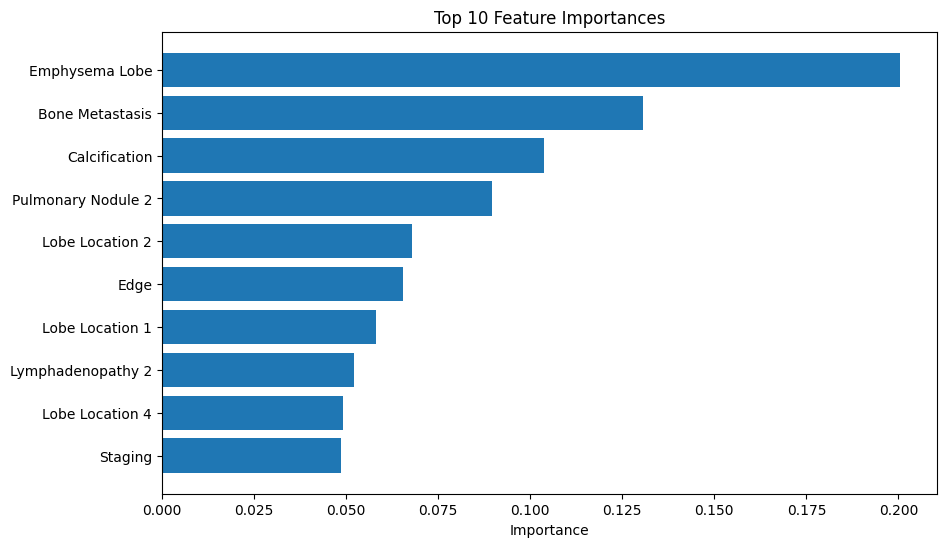

In [73]:
top_10_features_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_features_df['Feature'], top_10_features_df['Importance'])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()

**Correlation**

In [74]:
# numer_data = X_train.select_dtypes(include='number')
# numer_data['EGFR Mutation'] = y_train

# correlation = numer_data.corr()['EGFR Mutation']
# correlation = correlation.drop(labels=['EGFR Mutation'])
# top_features = correlation.sort_values(ascending=False).head(10).index.tolist()

# X_train = X_train[top_features].to_numpy()
# X_test = X_test[top_features].to_numpy()

# print(str(len(top_features)), "Features:")
# print(top_features)

### **Resampling**

In [75]:
# ros = RandomOverSampler(random_state=8)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# print("Class Distribution:", Counter(y_train))

# ada = ADASYN(random_state=8)
# X_train, y_train = ada.fit_resample(X_train, y_train)
# print("Class Distribution:", Counter(y_train))

smote = SMOTE(random_state=8)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Class Distribution:", Counter(y_train))

Class Distribution: Counter({0: 16, 1: 16})


Perform resampling (undersampling and oversampling) if the data is imbalanced.

## **Exploratory Data Analysis**

### **Separating Numerical and Categorical Data**

In [76]:
numerical_data_raw = df.select_dtypes(include='number')
categorical_data_raw = df.select_dtypes(include='object')

numerical_data = df_input.select_dtypes(include='number')
categorical_data = df_input.select_dtypes(include='object')

numerical_data_fix = df_fix.select_dtypes(include='number')
categorical_data_fix = df_fix.select_dtypes(include='object')

### **Histogram**

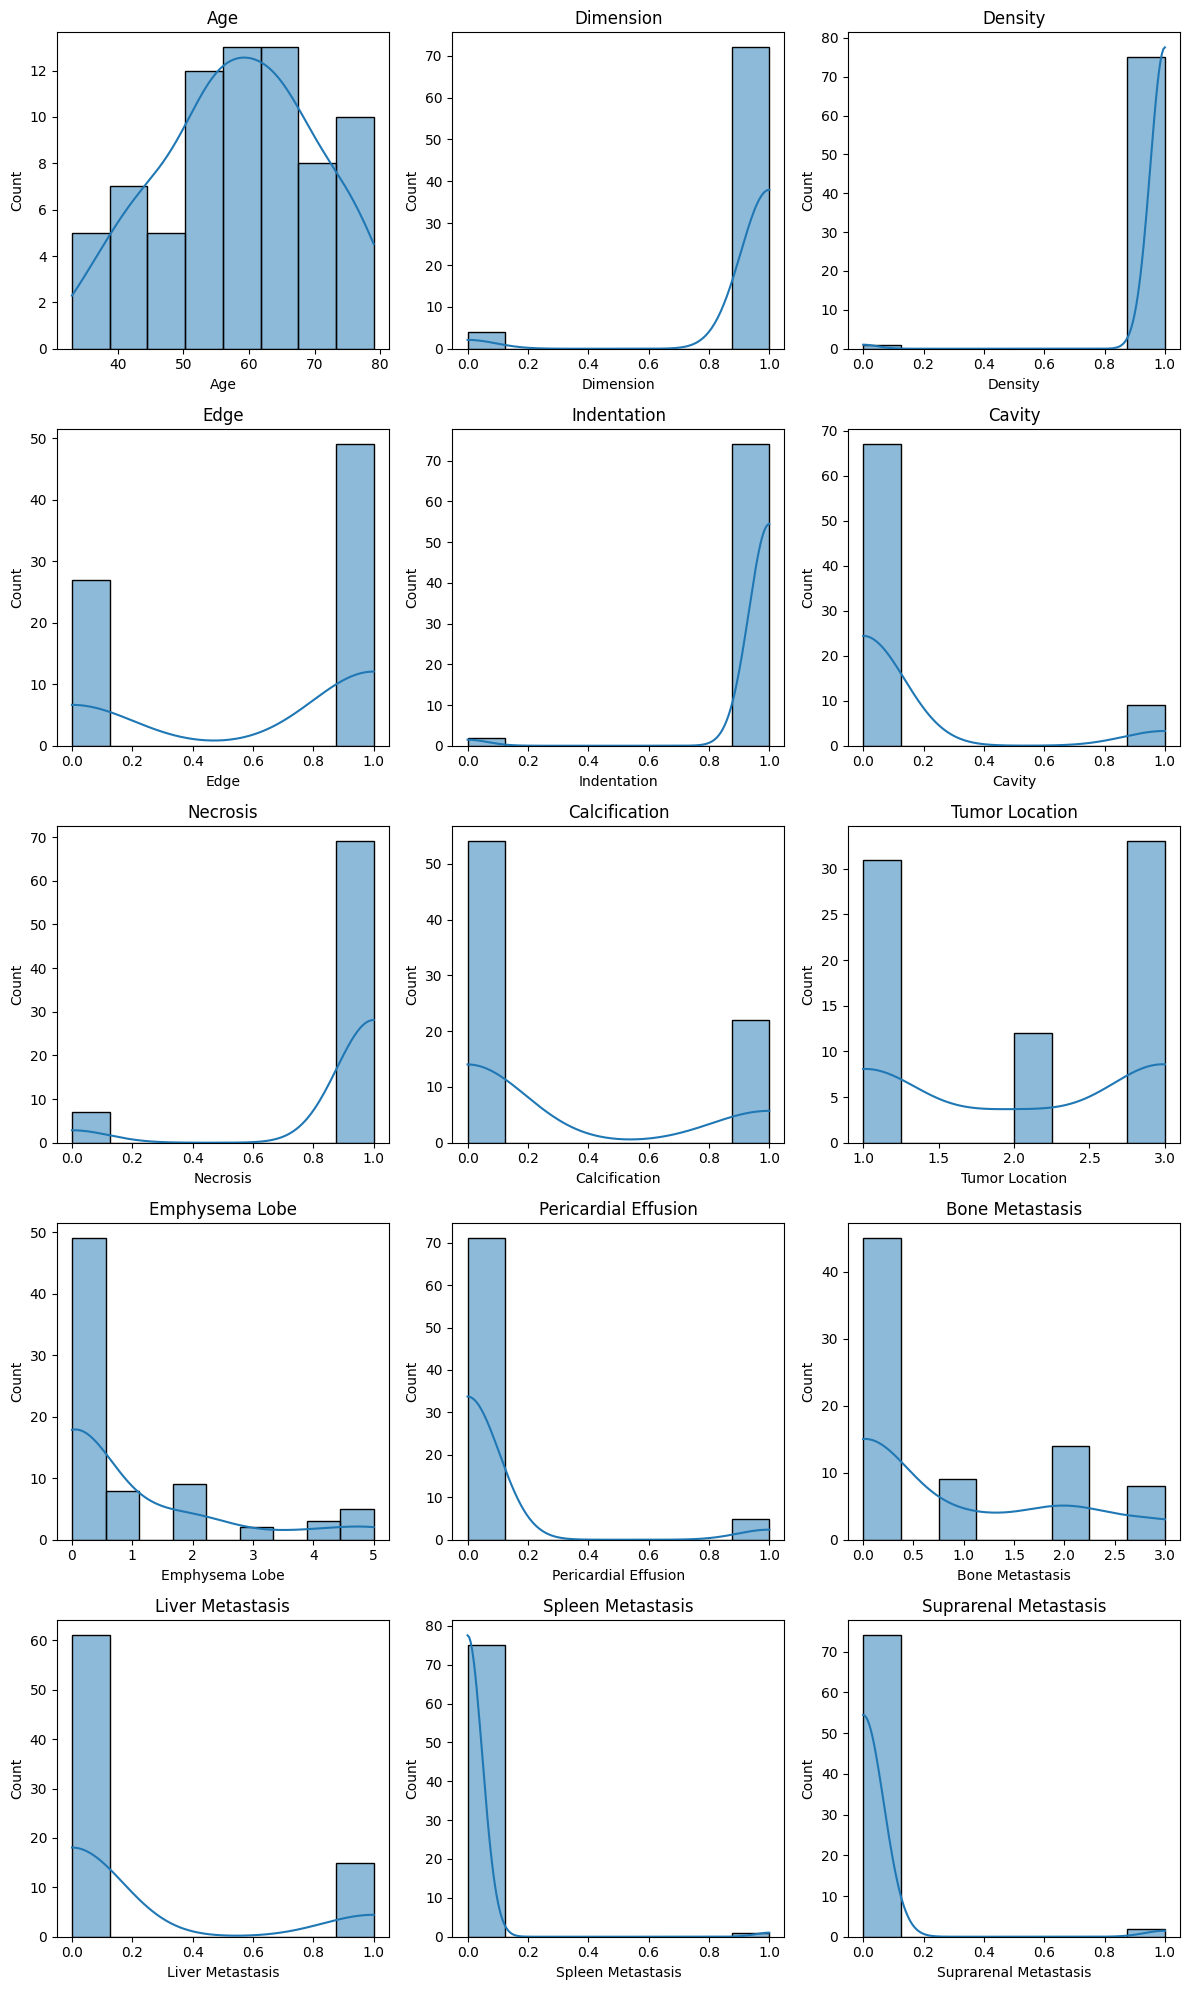

In [77]:
plt.figure(figsize=(12, 20))
num_cols = len(numerical_data_raw.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
for i, col in enumerate(numerical_data_raw.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(numerical_data_raw[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

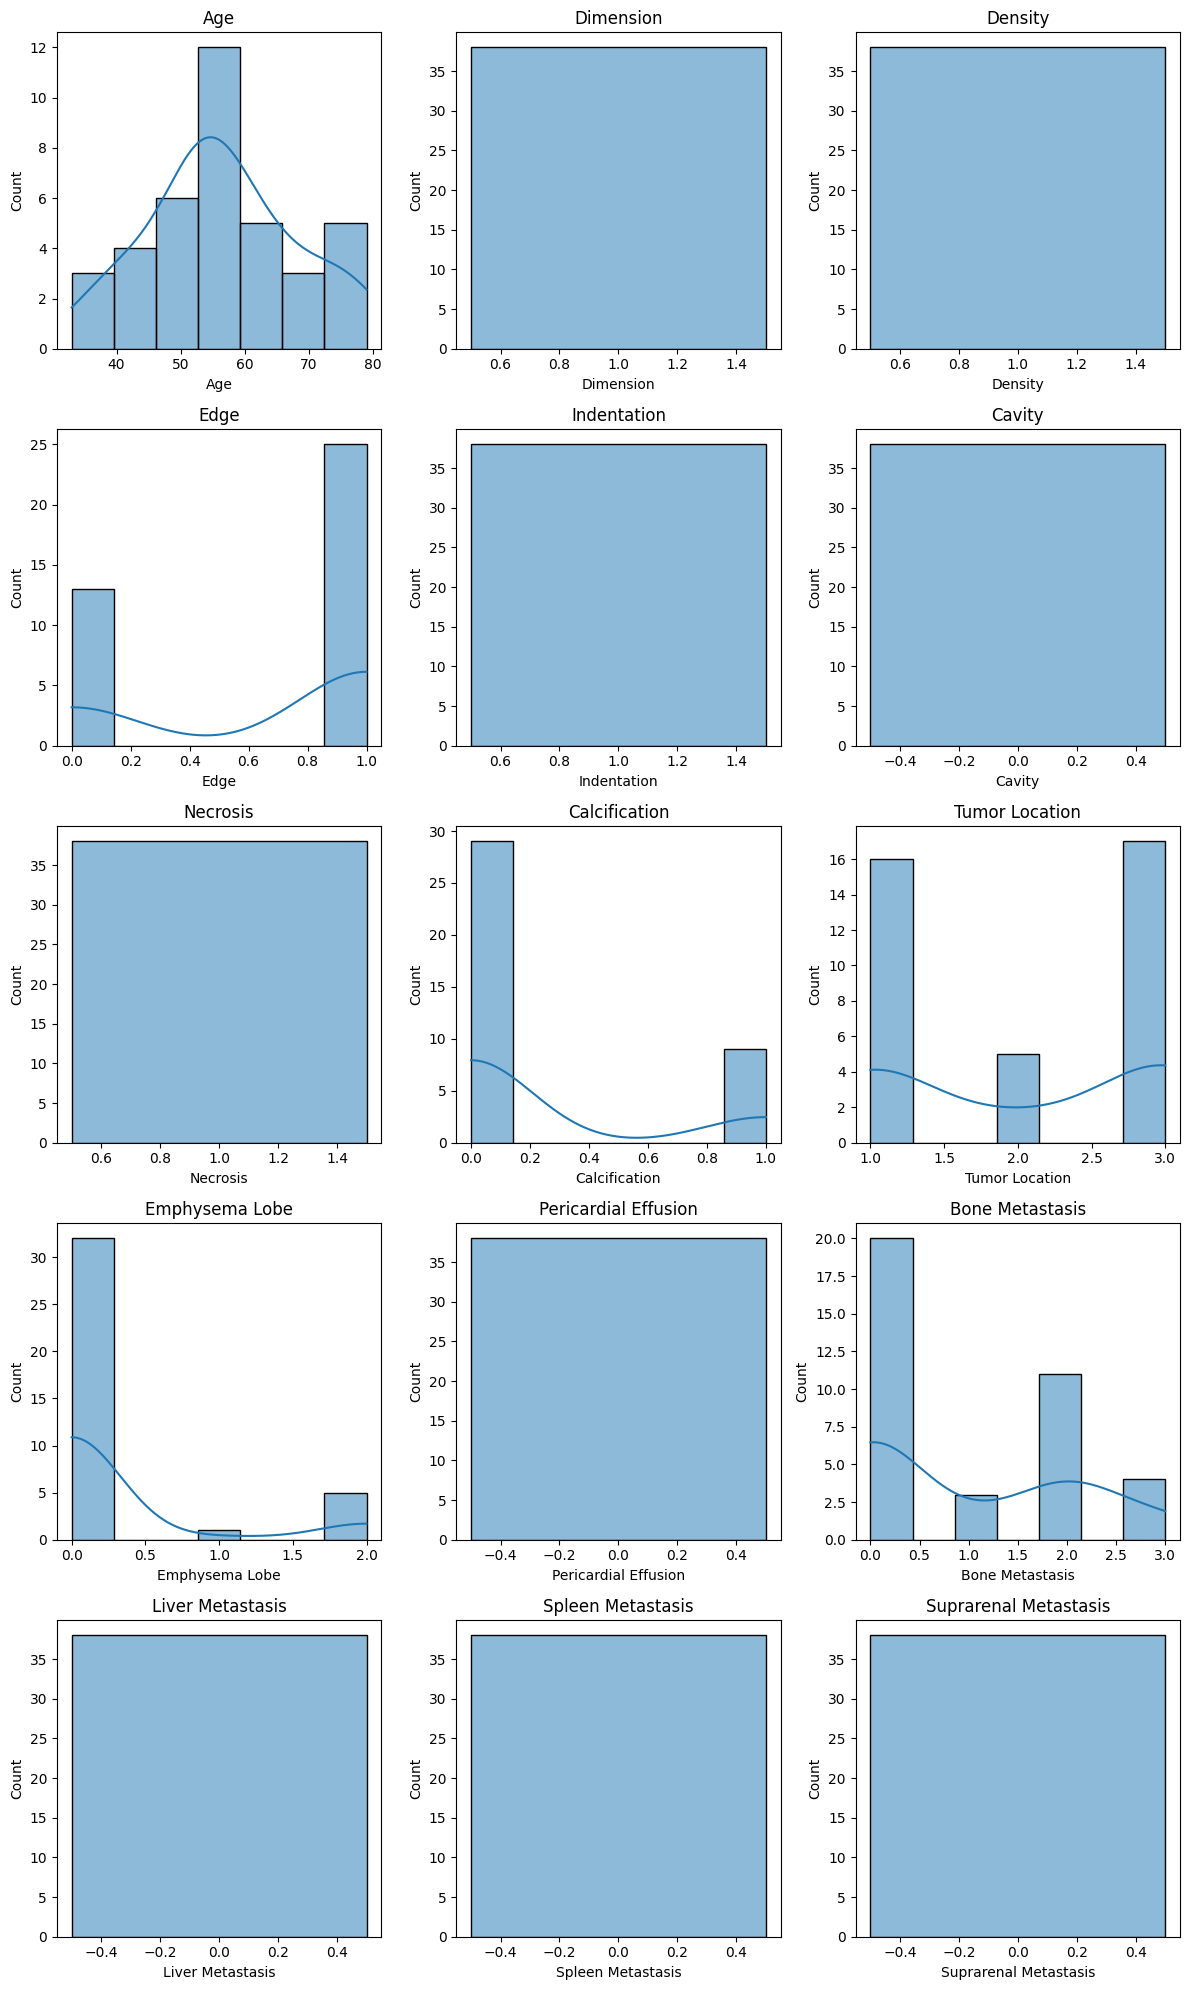

In [78]:
plt.figure(figsize=(12, 20))
num_cols = len(numerical_data.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
for i, col in enumerate(numerical_data.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(numerical_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

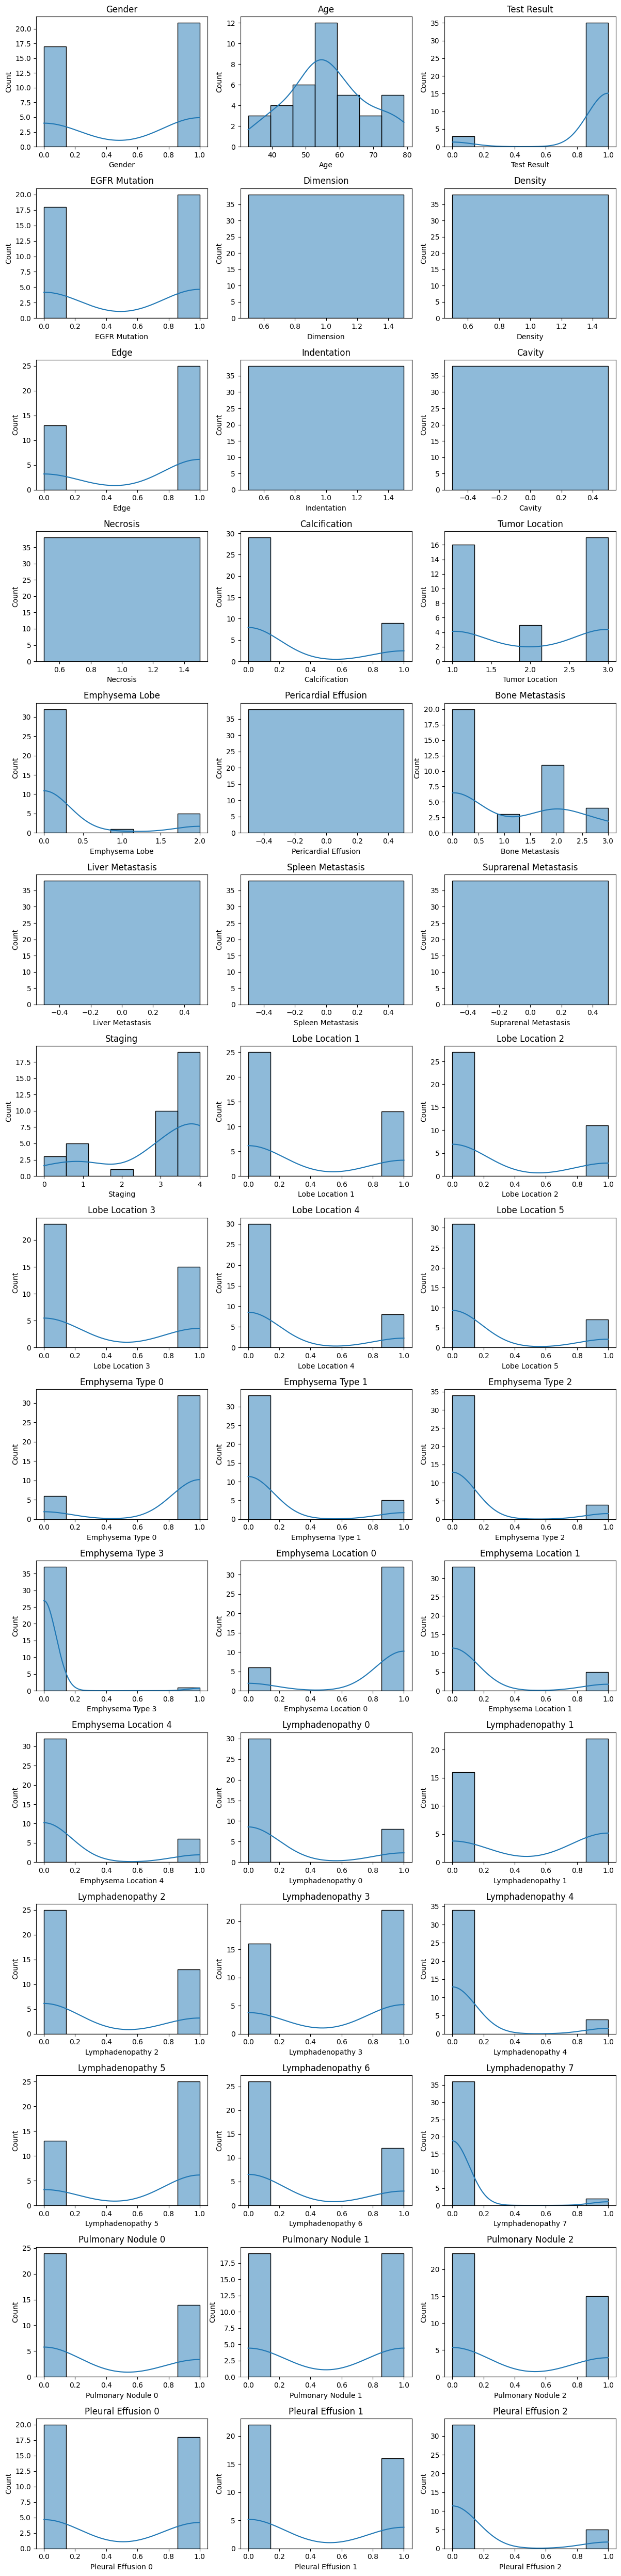

In [79]:
plt.figure(figsize=(12, 50))
num_cols = len(numerical_data_fix.columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)
for i, col in enumerate(numerical_data_fix.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.histplot(numerical_data_fix[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### **Box Plot**

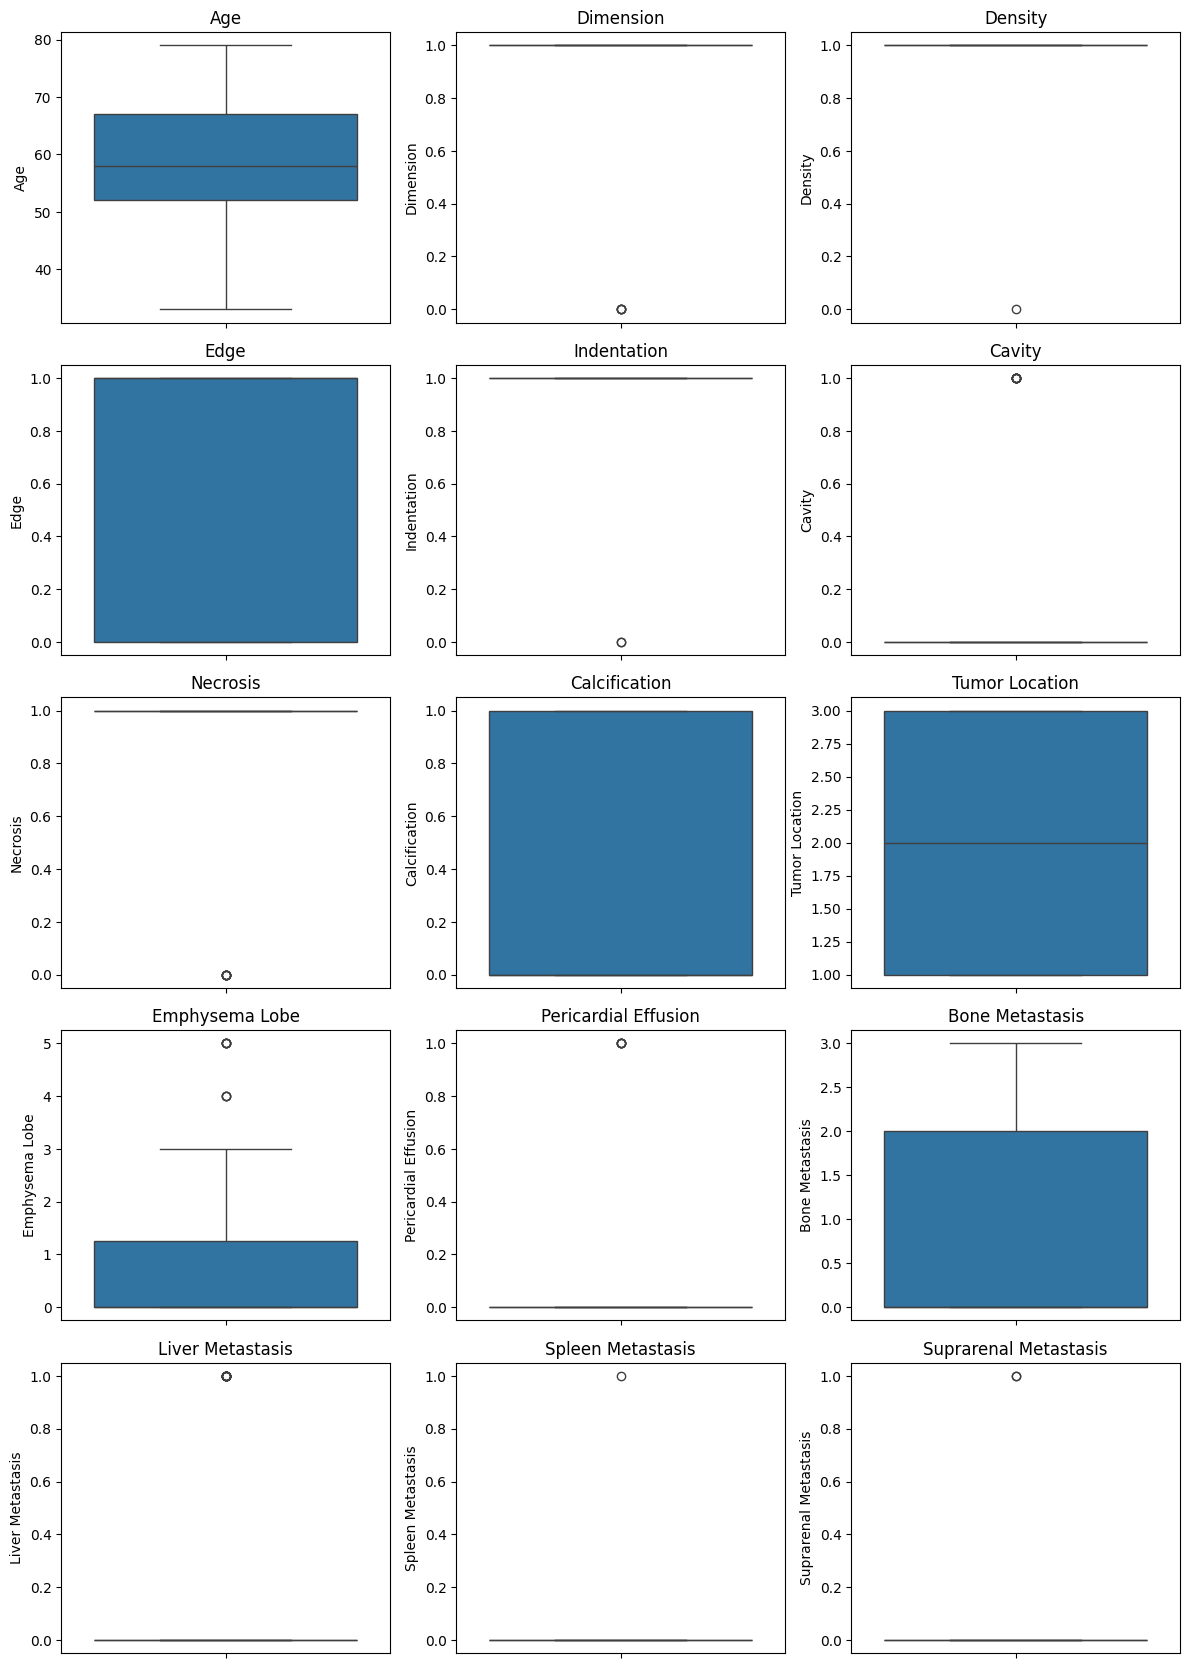

In [80]:
plt.figure(figsize=(12, 50))
for i, col in enumerate(numerical_data_raw.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.boxplot(y=numerical_data_raw[col])
    plt.title(col)
plt.tight_layout()
plt.show()

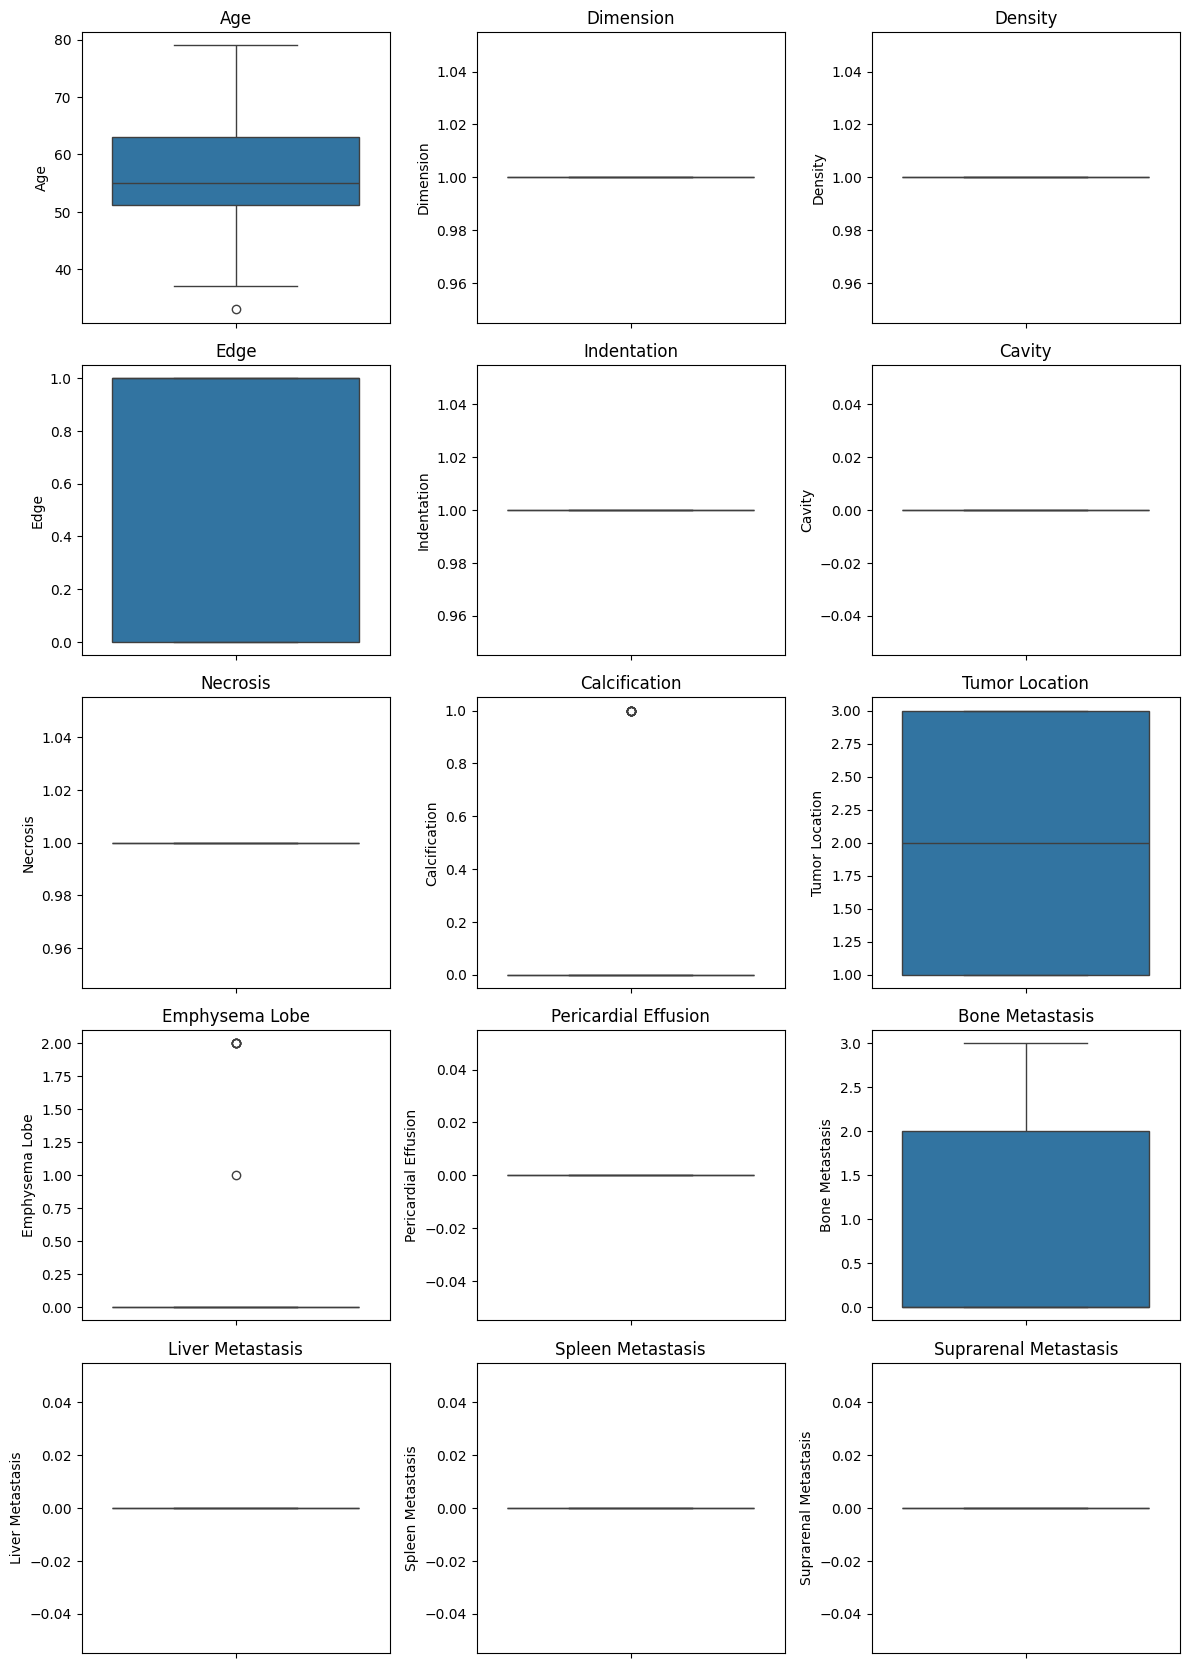

In [81]:
plt.figure(figsize=(12, 50))
for i, col in enumerate(numerical_data.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.boxplot(y=numerical_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

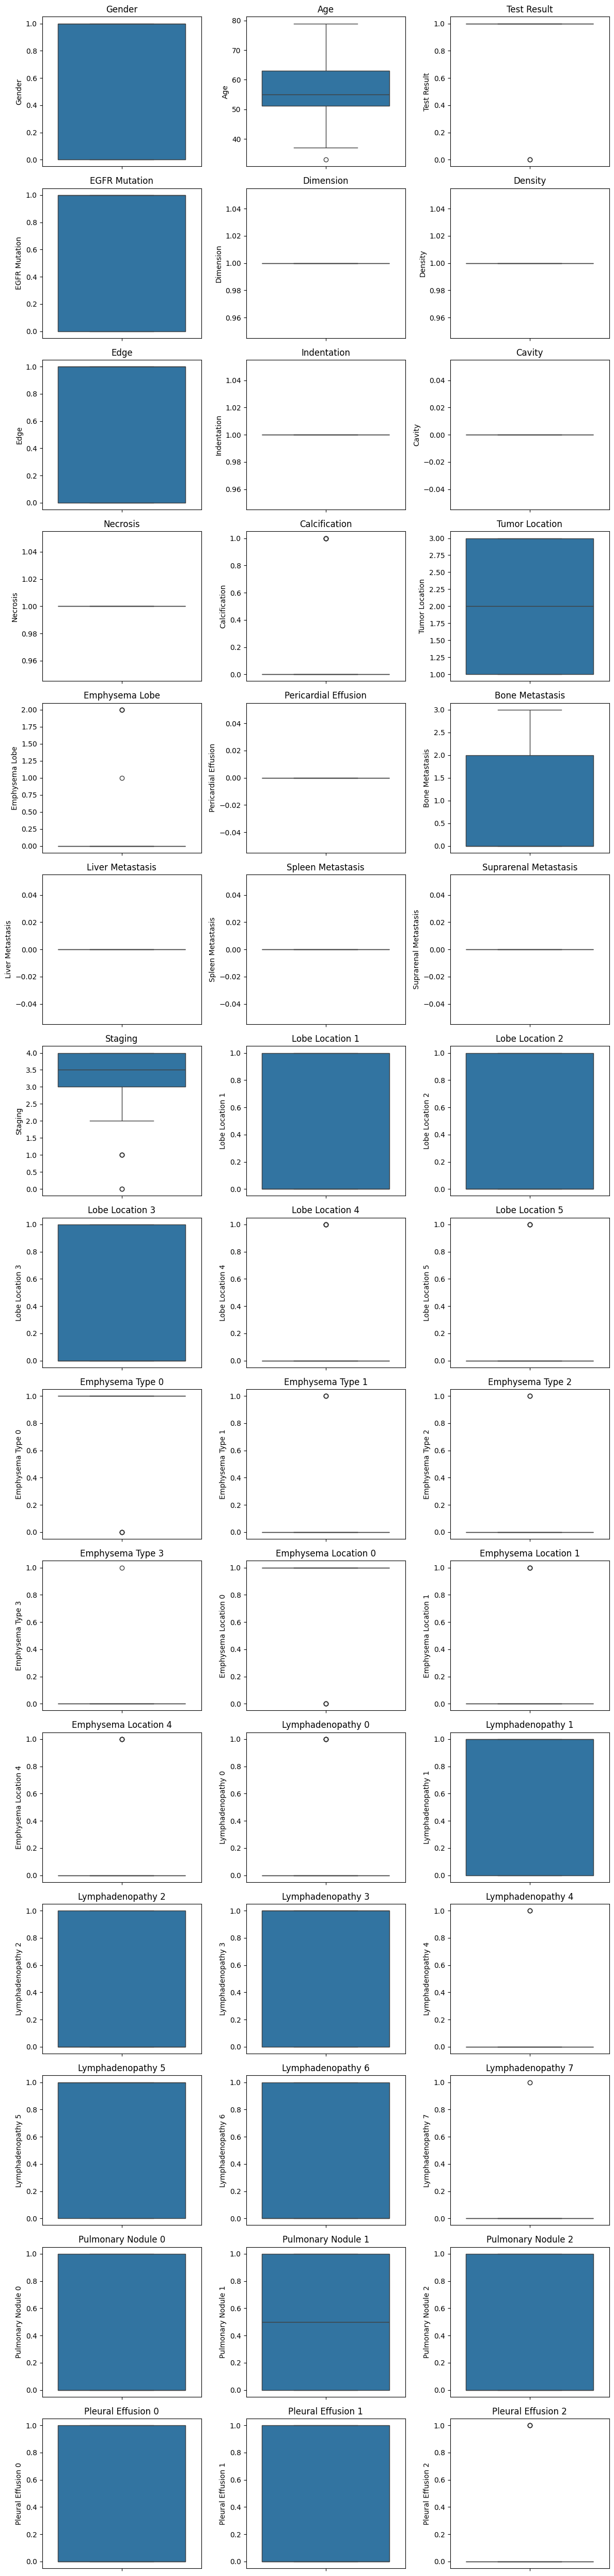

In [82]:
plt.figure(figsize=(12, 50))
for i, col in enumerate(numerical_data_fix.columns):
    plt.subplot(num_rows, 3, i+1)
    sns.boxplot(y=numerical_data_fix[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Data values vary widely.

### **Bar Chart**

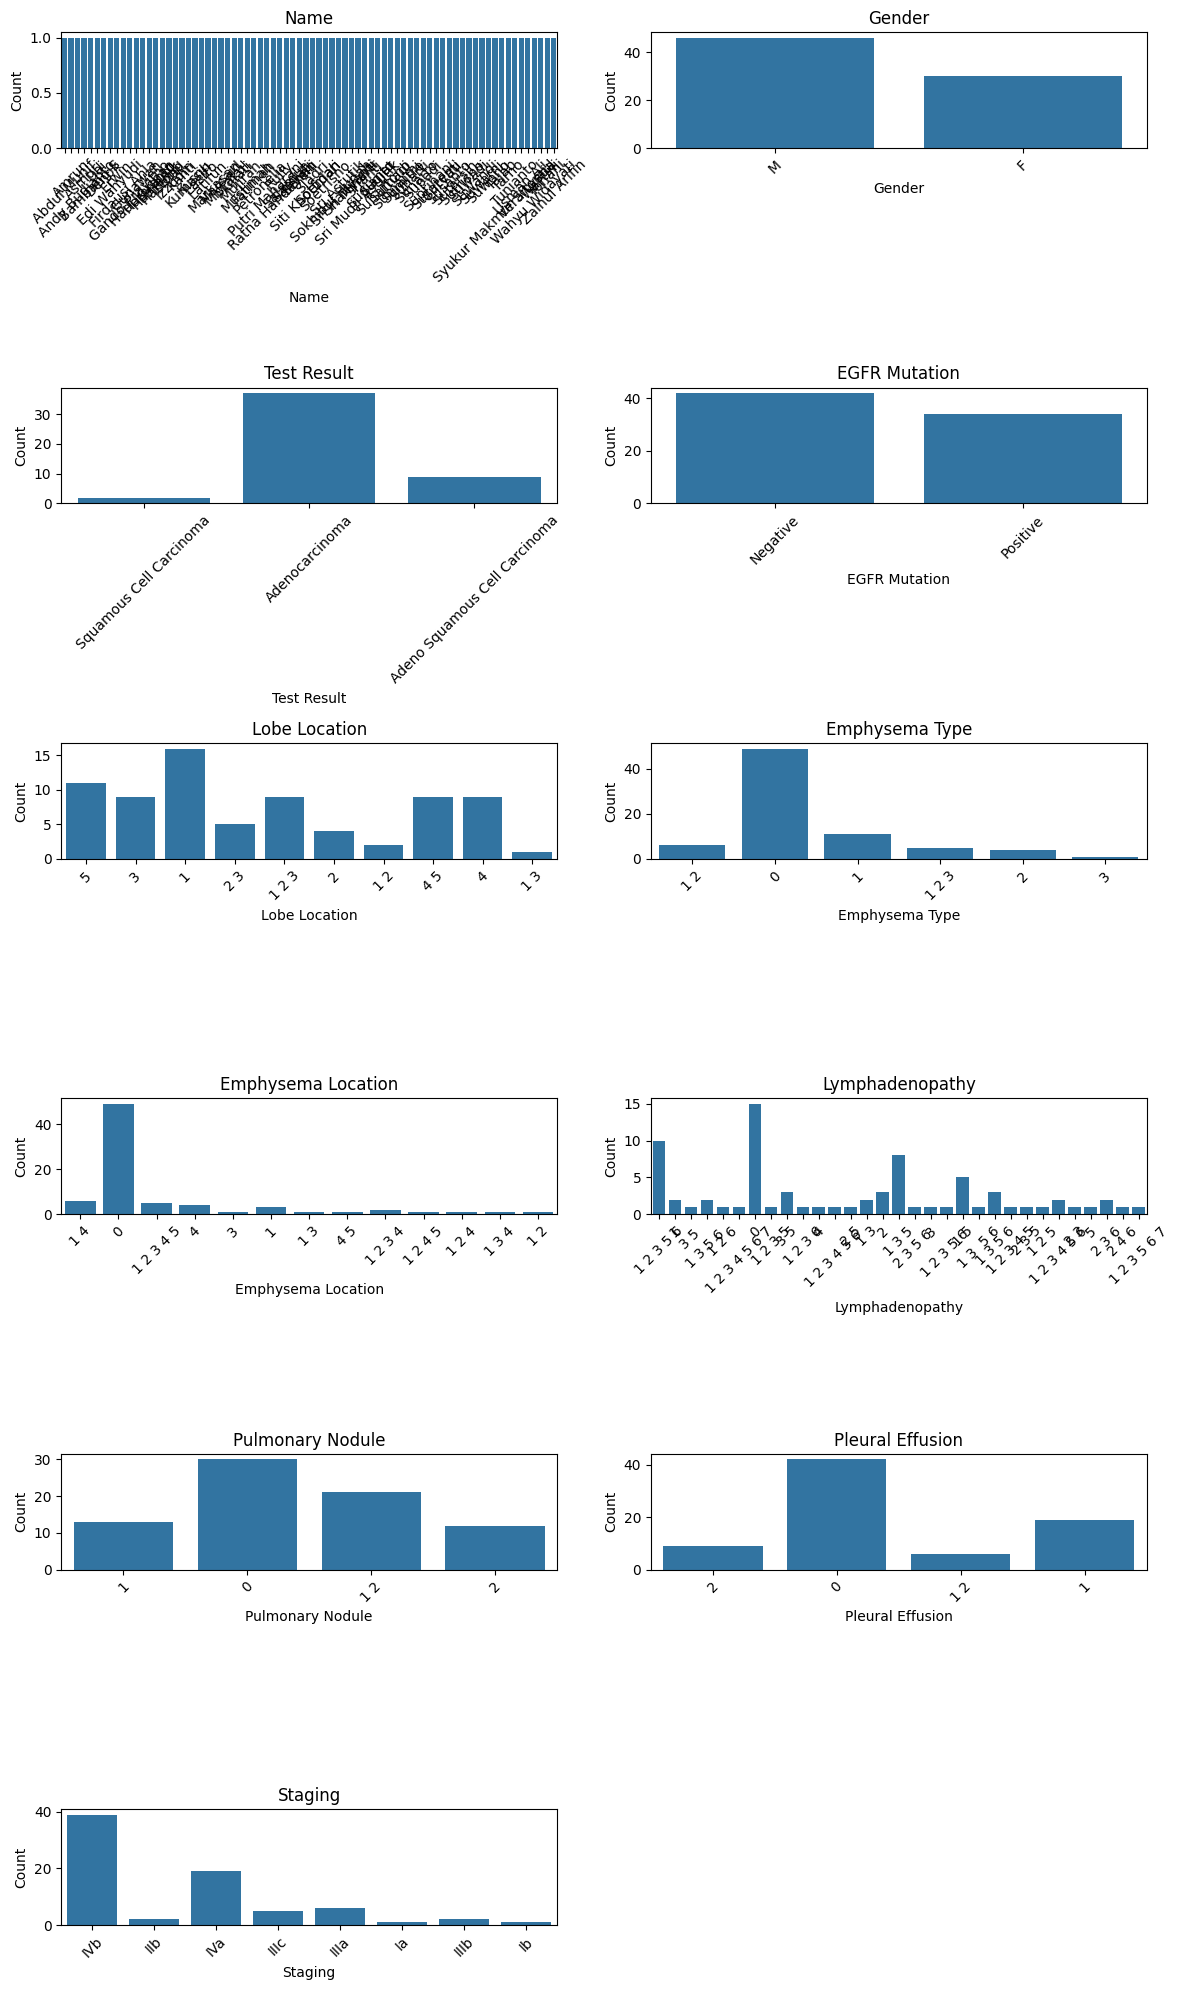

In [83]:
plt.figure(figsize=(12, 20))
num_rows = (len(categorical_data_raw.columns) + 1) // 2
for i, col in enumerate(categorical_data_raw.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=categorical_data_raw, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

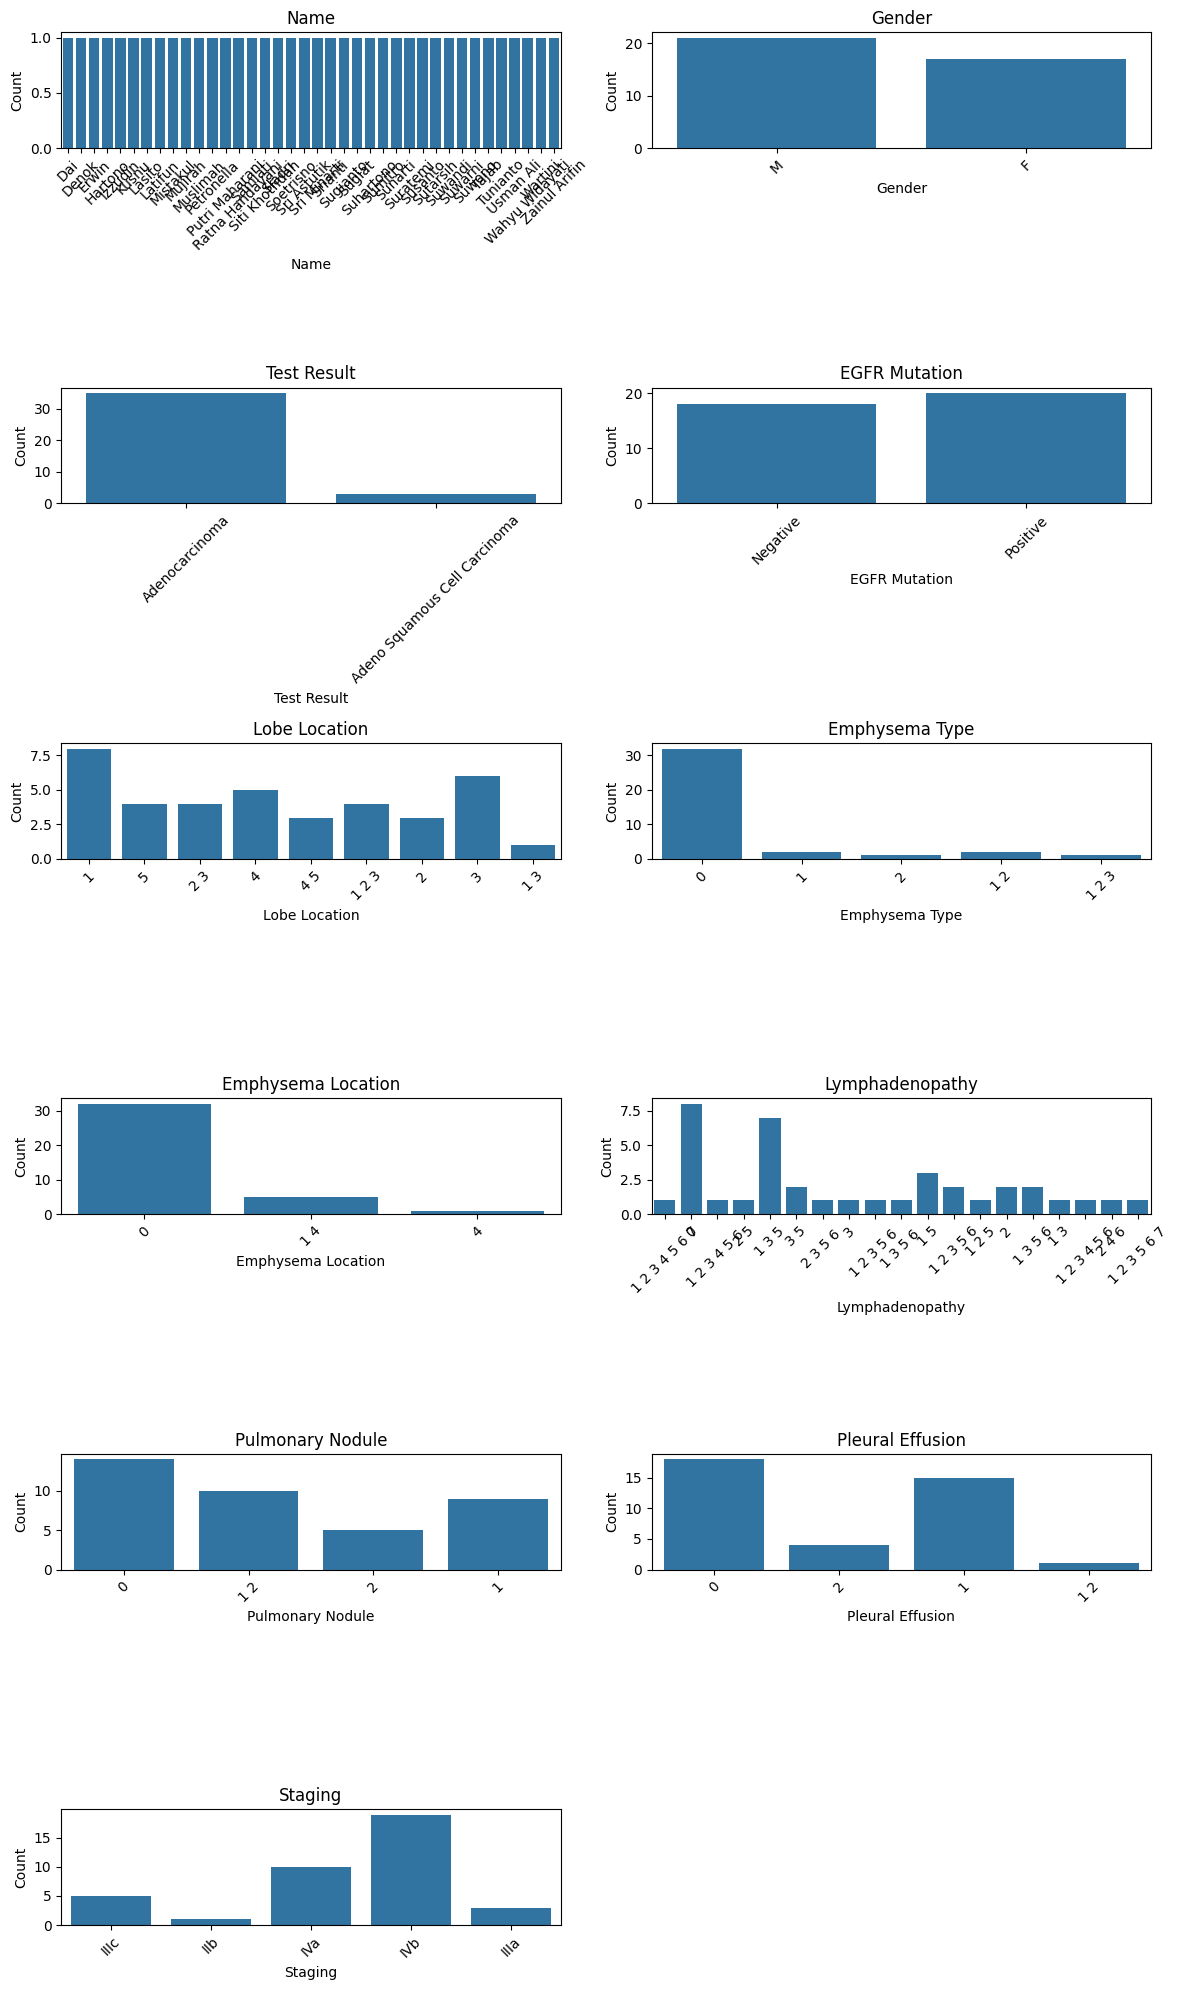

In [84]:
plt.figure(figsize=(12, 20))
num_rows = (len(categorical_data.columns) + 1) // 2
for i, col in enumerate(categorical_data.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=categorical_data, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

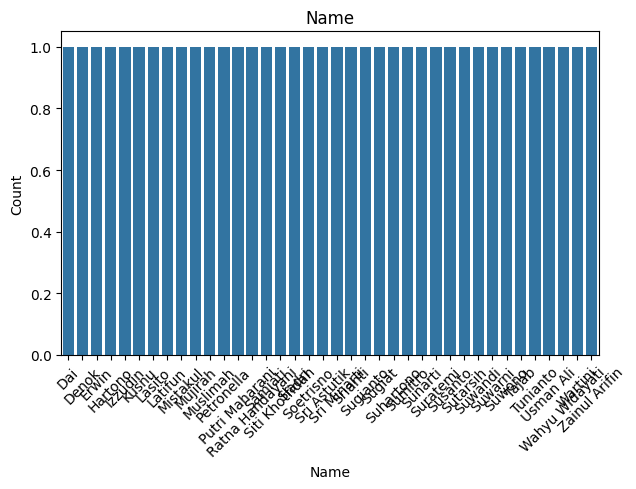

In [85]:
plt.figure(figsize=(12, 5))
num_rows = (len(categorical_data_fix.columns) + 1) // 2
for i, col in enumerate(categorical_data_fix.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.countplot(data=categorical_data_fix, x=col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.title(col)
plt.tight_layout()
plt.show()

- There are more men than women.
- The most common test result is Adenocarcinoma.
- There are more patients with negative EGFR mutations.
- The most common lobe location in patients is the right upper lobe.
- Emphysema Type, Emphysema Location, Lymphadenopathy, Pulmonary Nodule, and Pleural Effusion mostly have values of 0 or negative (not affected by these conditions).
- Stage IVb is the most common stage among patients.

### **Correlation**

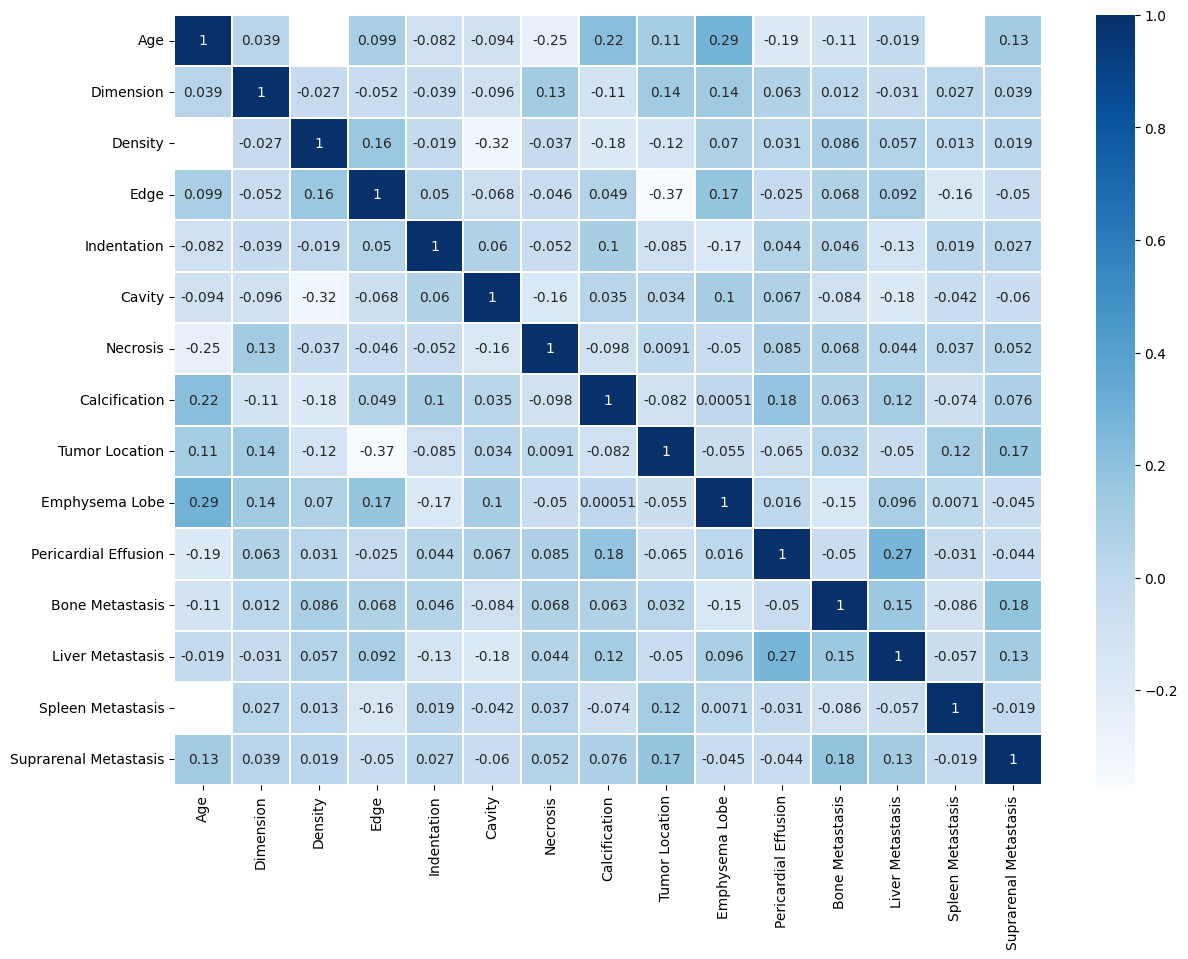

In [86]:
sns.heatmap(numerical_data_raw.corr(), annot=True, cmap='Blues', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

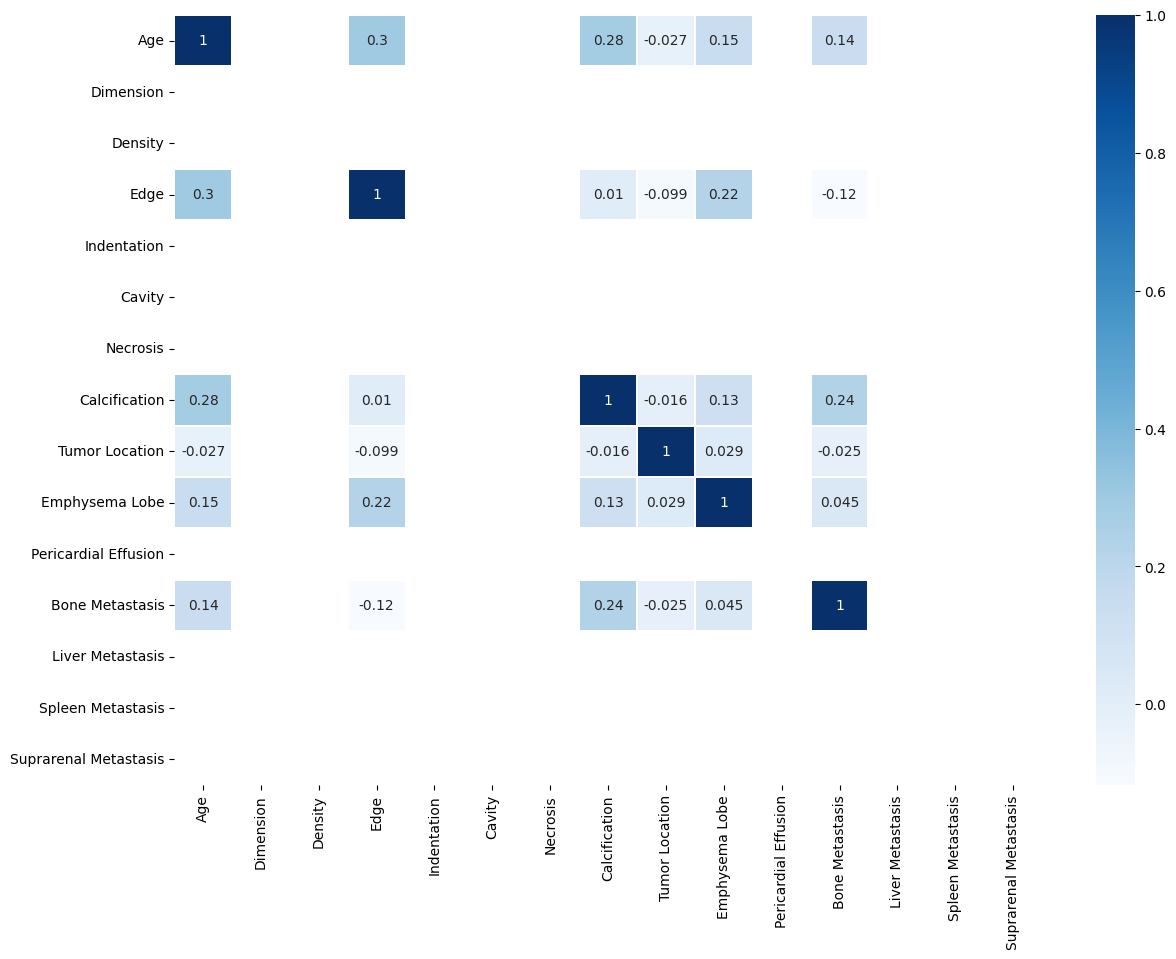

In [87]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='Blues', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

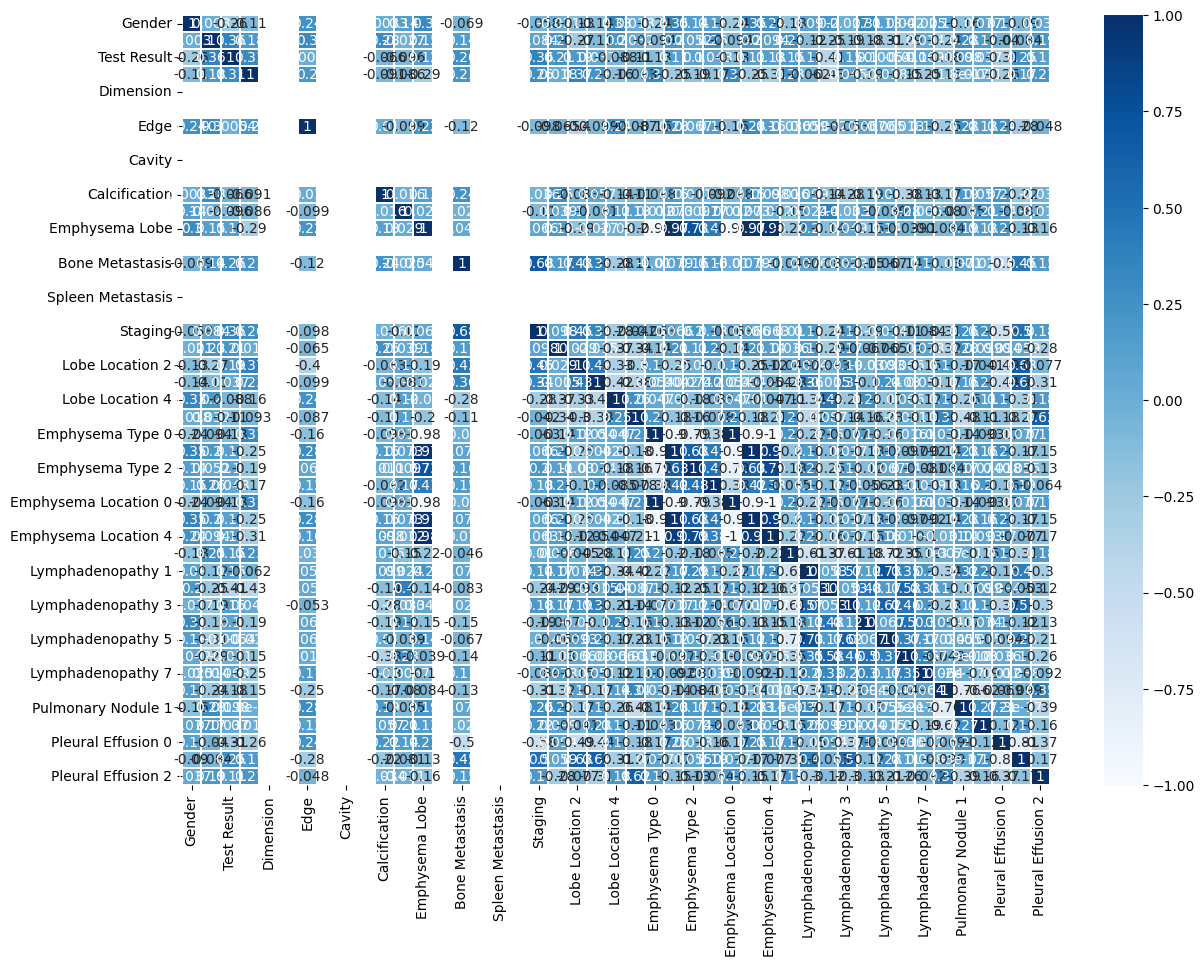

In [88]:
num_data = df_fix.select_dtypes(include='number')
sns.heatmap(num_data.corr(), annot=True, cmap='Blues', linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(14, 10)
plt.show()

## **Modeling (Classification)**

### **Modeling and Evaluation Needs**

In [89]:
models = pd.DataFrame(columns=['Model', 'Duration', 'Average Accuracy', 'Best Accuracy', 'Average AUC', 'Best AUC', 'Test Accuracy', 'Test AUC'])

In [90]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()

In [91]:
stratified_kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=20)

for fold, (train_idx, test_idx) in enumerate(stratified_kf.split(X_train, y_train), 1):
    y_train_fold = y_train[train_idx]
    y_test_fold = y_train[test_idx]

    X_train_fold = X_train[train_idx]
    X_test_fold = X_train[test_idx]

    print(f"Fold {fold}")
    print(f"Training set class distribution: {Counter(y_train_fold)}")
    print(f"Test set class distribution: {Counter(y_test_fold)}\n")

Fold 1
Training set class distribution: Counter({0: 12, 1: 12})
Test set class distribution: Counter({0: 4, 1: 4})

Fold 2
Training set class distribution: Counter({0: 12, 1: 12})
Test set class distribution: Counter({0: 4, 1: 4})

Fold 3
Training set class distribution: Counter({0: 12, 1: 12})
Test set class distribution: Counter({0: 4, 1: 4})

Fold 4
Training set class distribution: Counter({0: 12, 1: 12})
Test set class distribution: Counter({0: 4, 1: 4})



In [92]:
def custom_auc_scorer(estimator, X, y):
    if hasattr(estimator, "predict_proba"):
        probas = estimator.predict_proba(X)
        return roc_auc_score(y, probas[:, 1])
    else:
        return float('nan')

scoring = {'accuracy': 'accuracy', 'roc_auc': custom_auc_scorer}

### **SVM**

In [93]:
start = time.time()
svm = SVC(probability=True)
cv_results = cross_validate(svm, X_train, y_train, cv=stratified_kf, scoring=scoring, verbose=100)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]

end = time.time()
duration = end - start

mean_acc = cv_results['test_accuracy'].mean()
best_acc = cv_results['test_accuracy'].max()
print("Cross-Validation Accuracy scores for each fold:", cv_results['test_accuracy'])
print("Average Accuracy score:", mean_acc)
print("Best Accuracy score:", best_acc)

mean_auc = cv_results['test_roc_auc'].mean()
best_auc = cv_results['test_roc_auc'].max()
print("Cross-Validation AUC scores for each fold:", cv_results['test_roc_auc'])
print("Average AUC score:", mean_auc)
print("Best AUC score:", best_auc)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print("Accuracy on Test Data:", acc)
print("AUC on Test Data:", auc)

[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.750) roc_auc: (test=0.750) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.875) roc_auc: (test=0.875) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.375) roc_auc: (test=0.500) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.750) roc_auc: (test=0.812) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
Cross-Validation Accuracy scores for each fold:

In [94]:
new_row = {"Model": "SVM", "Duration": duration, "Average Accuracy": mean_acc, "Best Accuracy": best_acc, "Average AUC": mean_auc, "Best AUC": best_auc, "Test Accuracy": acc, "Test AUC": auc}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **KNN**

In [95]:
start = time.time()
knn = KNeighborsClassifier()
cv_results = cross_validate(knn, X_train, y_train, cv=stratified_kf, scoring=scoring, verbose=100)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]

end = time.time()
duration = end - start

mean_acc = cv_results['test_accuracy'].mean()
best_acc = cv_results['test_accuracy'].max()
print("Cross-Validation Accuracy scores for each fold:", cv_results['test_accuracy'])
print("Average Accuracy score:", mean_acc)
print("Best Accuracy score:", best_acc)

mean_auc = cv_results['test_roc_auc'].mean()
best_auc = cv_results['test_roc_auc'].max()
print("Cross-Validation AUC scores for each fold:", cv_results['test_roc_auc'])
print("Average AUC score:", mean_auc)
print("Best AUC score:", best_auc)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print("Accuracy on Test Data:", acc)
print("AUC on Test Data:", auc)

[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.750) roc_auc: (test=0.781) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.750) roc_auc: (test=0.938) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.500) roc_auc: (test=0.375) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.750) roc_auc: (test=0.781) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.1s
Cross-Validation Accuracy scores for each fold:

In [96]:
new_row = {"Model": "KNN", "Duration": duration, "Average Accuracy": mean_acc, "Best Accuracy": best_acc, "Average AUC": mean_auc, "Best AUC": best_auc, "Test Accuracy": acc, "Test AUC": auc}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Naive Bayes**

In [97]:
start = time.time()
nb = GaussianNB()
cv_results = cross_validate(nb, X_train, y_train, cv=stratified_kf, scoring=scoring, verbose=100)

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_proba = nb.predict_proba(X_test)[:, 1]

end = time.time()
duration = end - start

mean_acc = cv_results['test_accuracy'].mean()
best_acc = cv_results['test_accuracy'].max()
print("Cross-Validation Accuracy scores for each fold:", cv_results['test_accuracy'])
print("Average Accuracy score:", mean_acc)
print("Best Accuracy score:", best_acc)

mean_auc = cv_results['test_roc_auc'].mean()
best_auc = cv_results['test_roc_auc'].max()
print("Cross-Validation AUC scores for each fold:", cv_results['test_roc_auc'])
print("Average AUC score:", mean_auc)
print("Best AUC score:", best_auc)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print("Accuracy on Test Data:", acc)
print("AUC on Test Data:", auc)

[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.750) roc_auc: (test=0.812) total time=   0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.750) roc_auc: (test=0.750) total time=   0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.625) roc_auc: (test=0.688) total time=   0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.875) roc_auc: (test=0.875) total time=   0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
Cross-Validation Accuracy scores for each fold:

In [98]:
new_row = {"Model": "Naive Bayes", "Duration": duration, "Average Accuracy": mean_acc, "Best Accuracy": best_acc, "Average AUC": mean_auc, "Best AUC": best_auc, "Test Accuracy": acc, "Test AUC": auc}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **XGBoost Scratch**

In [99]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def gradient(y_true, y_pred):
    y_pred = sigmoid(y_pred)
    return y_pred - y_true

def hessian(y_pred):
    y_pred = sigmoid(y_pred)
    return y_pred * (1 - y_pred)

def leaf_value(g, h, reg_lambda):
    return -np.sum(g) / (np.sum(h) + reg_lambda)

def find_best_split(X, g, h, reg_lambda, gamma):
    best_gain = -np.inf
    best_split = None

    for feature_index in range(X.shape[1]):
        unique_values = np.unique(X[:, feature_index])

        for split_value in unique_values:
            left_mask = X[:, feature_index] <= split_value
            right_mask = ~left_mask

            g_left, g_right = np.sum(g[left_mask]), np.sum(g[right_mask])
            h_left, h_right = np.sum(h[left_mask]), np.sum(h[right_mask])

            gain = calculate_gain(g_left, g_right, h_left, h_right, reg_lambda, gamma)

            if gain > best_gain:
                best_gain = gain
                best_split = (feature_index, split_value)

    return best_split, best_gain

def calculate_gain(g_left, g_right, h_left, h_right, reg_lambda, gamma):
    gain = 0.5 * ((g_left**2 / (h_left + reg_lambda)) + (g_right**2 / (h_right + reg_lambda)) - (g_left + g_right)**2 / (h_left + h_right + reg_lambda)) - gamma
    return gain

def build_tree(X, g, h, depth, max_depth, reg_lambda, gamma):
    if depth >= max_depth or len(g) == 0:
        return leaf_value(g, h, reg_lambda)

    best_split, best_gain = find_best_split(X, g, h, reg_lambda, gamma)

    if best_split is None:
        return leaf_value(g, h, reg_lambda)

    feature_index, split_value = best_split

    left_mask = X[:, feature_index] <= split_value
    right_mask = ~left_mask

    left_tree = build_tree(X[left_mask], g[left_mask], h[left_mask], depth + 1, max_depth, reg_lambda, gamma)
    right_tree = build_tree(X[right_mask], g[right_mask], h[right_mask], depth + 1, max_depth, reg_lambda, gamma)

    return (feature_index, split_value, left_tree, right_tree)

class XGBoostScratchClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, reg_lambda=1.0, gamma=0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.reg_lambda = reg_lambda
        self.gamma = gamma
        self.trees = []

    def fit(self, X, y):
        y_pred = np.full_like(y, 0.5, dtype=np.float64)

        for i in range(self.n_estimators):
            g = gradient(y, y_pred)
            h = hessian(y_pred)

            if np.any(np.isnan(g)) or np.any(np.isnan(h)):
                break

            tree = build_tree(X, g, h, 0, self.max_depth, self.reg_lambda, self.gamma)
            y_pred += self.learning_rate * self._predict_tree(tree, X)
            self.trees.append(tree)

        final_probabilities = sigmoid(y_pred)
        final_predictions = (final_probabilities > 0.5).astype(int)

    def _predict_tree(self, tree, X):
        if isinstance(tree, (int, float, np.float64)):
            return np.full(X.shape[0], tree)

        feature_index, split_value, left_tree, right_tree = tree
        left_mask = X[:, feature_index] <= split_value
        right_mask = ~left_mask

        y_pred = np.zeros(X.shape[0])
        y_pred[left_mask] = self._predict_tree(left_tree, X[left_mask])
        y_pred[right_mask] = self._predict_tree(right_tree, X[right_mask])

        return y_pred

    def predict(self, X):
        y_pred = np.zeros(X.shape[0], dtype=np.float64)
        for tree in self.trees:
            y_pred += self.learning_rate * self._predict_tree(tree, X)
        final_probabilities = sigmoid(y_pred)
        final_predictions = (final_probabilities > 0.5).astype(int)
        return final_predictions

    def predict_proba(self, X):
        y_pred = np.zeros(X.shape[0], dtype=np.float64)
        for tree in self.trees:
            y_pred += self.learning_rate * self._predict_tree(tree, X)
        proba = sigmoid(y_pred)
        return np.column_stack([1 - proba, proba])

    def get_params(self, deep=True):
        return {"n_estimators": self.n_estimators, "learning_rate": self.learning_rate, "reg_lambda": self.reg_lambda, "gamma": self.gamma, "max_depth": self.max_depth}

    def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

In [131]:
model_grid = XGBoostScratchClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'reg_lambda': [1, 5, 9],
    'gamma': [0, 1, 2]
}

grid_search = GridSearchCV(estimator=model_grid, param_grid=param_grid, scoring=scoring, refit='roc_auc', cv=stratified_kf)
grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Average Accuracy: ", grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_])
print("Best Average AUC: ", grid_search.cv_results_['mean_test_roc_auc'][grid_search.best_index_])

best_model = grid_search.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_proba)
print("Test Accuracy: ", best_model.score(X_test, y_test))
print("Test AUC: ", test_auc)

Best Parameters:  {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 1}
Best Average Accuracy:  0.84375
Best Average AUC:  0.9453125
Test Accuracy:  1.0
Test AUC:  1.0


In [132]:
results = grid_search.cv_results_

for i in range(len(results['params'])):
    print(f"Parameters: {results['params'][i]}")

    print(f"Fold 1 Accuracy: {results['split0_test_accuracy'][i]}")
    print(f"Fold 2 Accuracy: {results['split1_test_accuracy'][i]}")
    print(f"Fold 3 Accuracy: {results['split2_test_accuracy'][i]}")
    print(f"Fold 4 Accuracy: {results['split3_test_accuracy'][i]}")
    print(f"Mean Accuracy: {results['mean_test_accuracy'][i]}")

    print(f"Fold 1 AUC: {results['split0_test_roc_auc'][i]}")
    print(f"Fold 2 AUC: {results['split1_test_roc_auc'][i]}")
    print(f"Fold 3 AUC: {results['split2_test_roc_auc'][i]}")
    print(f"Fold 4 AUC: {results['split3_test_roc_auc'][i]}")
    print(f"Mean AUC: {results['mean_test_roc_auc'][i]}")

    model = XGBoostScratchClassifier(**results['params'][i])
    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    test_accuracy = np.mean(y_pred_test == y_test)

    y_proba_test = model.predict_proba(X_test)[:, 1]
    test_auc = roc_auc_score(y_test, y_proba_test)

    print(f"Test Accuracy for Parameters {results['params'][i]}: {test_accuracy}")
    print(f"Test AUC for Parameters {results['params'][i]}: {test_auc}")

    print('-' * 100)

Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 1}
Fold 1 Accuracy: 0.75
Fold 2 Accuracy: 0.75
Fold 3 Accuracy: 0.625
Fold 4 Accuracy: 0.875
Mean Accuracy: 0.75
Fold 1 AUC: 0.9375
Fold 2 AUC: 1.0
Fold 3 AUC: 0.65625
Fold 4 AUC: 1.0
Mean AUC: 0.8984375
Test Accuracy for Parameters {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 1}: 0.875
Test AUC for Parameters {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 1}: 1.0
----------------------------------------------------------------------------------------------------
Parameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'reg_lambda': 5}
Fold 1 Accuracy: 0.75
Fold 2 Accuracy: 0.875
Fold 3 Accuracy: 0.625
Fold 4 Accuracy: 0.75
Mean Accuracy: 0.75
Fold 1 AUC: 0.8125
Fold 2 AUC: 0.875
Fold 3 AUC: 0.625
Fold 4 AUC: 0.9375
Mean AUC: 0.8125
Test Accuracy for Parameters {'gamma': 0, 'learning_rate

In [102]:
start = time.time()
model = XGBoostScratchClassifier(n_estimators=50, learning_rate=0.3, max_depth=3, reg_lambda=1, gamma=0)
cv_results = cross_validate(model, X_train, y_train, cv=stratified_kf, scoring=scoring, verbose=100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

end = time.time()
duration = end - start

mean_acc = cv_results['test_accuracy'].mean()
best_acc = cv_results['test_accuracy'].max()
print("Cross-Validation Accuracy scores for each fold:", cv_results['test_accuracy'])
print("Average Accuracy score:", mean_acc)
print("Best Accuracy score:", best_acc)

mean_auc = cv_results['test_roc_auc'].mean()
best_auc = cv_results['test_roc_auc'].max()
print("Cross-Validation AUC scores for each fold:", cv_results['test_roc_auc'])
print("Average AUC score:", mean_auc)
print("Best AUC score:", best_auc)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print("Accuracy on Test Data:", acc)
print("AUC on Test Data:", auc)

[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.750) roc_auc: (test=0.938) total time=   0.3s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.3s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.875) roc_auc: (test=1.000) total time=   0.3s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.6s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=0.750) roc_auc: (test=0.844) total time=   0.3s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.9s
[CV] START .....................................................................
[CV] END ....... accuracy: (test=1.000) roc_auc: (test=1.000) total time=   0.3s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    1.2s
Cross-Validation Accuracy scores for each fold:

In [103]:
def cnf_matrix_plot(y_test, y_pred):
  cnf_matrix = confusion_matrix(y_test, y_pred)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

def roc_auc_plot(X_test, y_test, model):
  y_prob = model.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_prob)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='lightblue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC)')
  plt.legend(loc="lower right")
  plt.show()
  return roc_auc

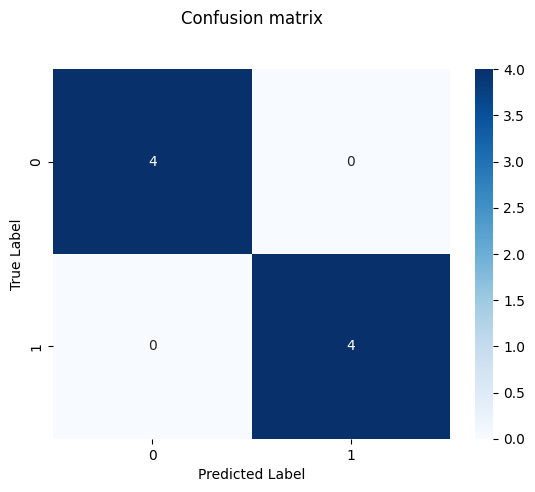

In [104]:
cnf_matrix_plot(y_test, y_pred)

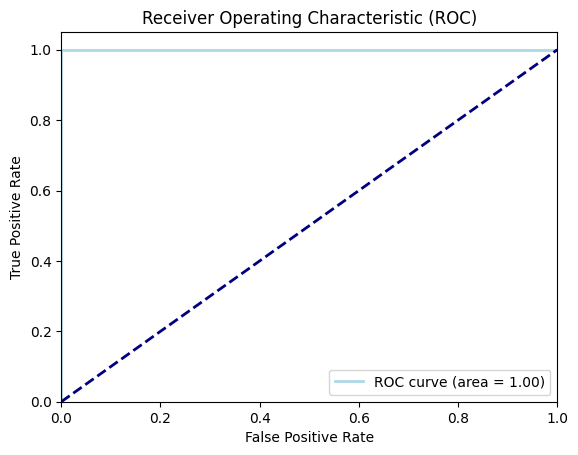

In [130]:
from sklearn.metrics import auc
roc_auc = roc_auc_plot(X_test, y_test, model)

In [106]:
new_row = {"Model": "XGBoost Scratch", "Duration": duration, "Average Accuracy": mean_acc, "Best Accuracy": best_acc, "Average AUC": mean_auc, "Best AUC": best_auc, "Test Accuracy": acc, "Test AUC": auc}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

### **Light Gradient Boosting (LightGBM)**

In [107]:
start = time.time()
lgbm = LGBMClassifier()
cv_results = cross_validate(lgbm, X_train, y_train, cv=stratified_kf, scoring=scoring, verbose=100)

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
y_proba = lgbm.predict_proba(X_test)[:, 1]

end = time.time()
duration = end - start

mean_acc = cv_results['test_accuracy'].mean()
best_acc = cv_results['test_accuracy'].max()
print("Cross-Validation Accuracy scores for each fold:", cv_results['test_accuracy'])
print("Average Accuracy score:", mean_acc)
print("Best Accuracy score:", best_acc)

mean_auc = cv_results['test_roc_auc'].mean()
best_auc = cv_results['test_roc_auc'].max()
print("Cross-Validation AUC scores for each fold:", cv_results['test_roc_auc'])
print("Average AUC score:", mean_auc)
print("Best AUC score:", best_auc)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print("Accuracy on Test Data:", acc)
print("AUC on Test Data:", auc)

[CV] START .....................................................................
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 12, number of negative: 12
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 24, number of used features: 0
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] 

In [108]:
new_row = {"Model": "LightGBM", "Duration": duration, "Average Accuracy": mean_acc, "Best Accuracy": best_acc, "Average AUC": mean_auc, "Best AUC": best_auc, "Test Accuracy": acc, "Test AUC": auc}
models = pd.concat([models, pd.DataFrame([new_row])], ignore_index=True)

## **Evaluation**

In [109]:
ac = models.sort_values(by="Average Accuracy", ascending=False).reset_index(drop=True)
bc = models.sort_values(by="Best Accuracy", ascending=False).reset_index(drop=True)
aa = models.sort_values(by="Average AUC", ascending=False).reset_index(drop=True)
ba = models.sort_values(by="Best AUC", ascending=False).reset_index(drop=True)

mods = np.array(models['Model'])
scores = []

def score(df):
  for mod in mods:
    score = 0
    index = ac[ac['Model'] == mod].index
    score += index
    index = bc[bc['Model'] == mod].index
    score += index
    index = aa[aa['Model'] == mod].index
    score += index
    index = ba[ba['Model'] == mod].index
    score += index
    scores.append(score)

score(models)
models['Score'] = pd.DataFrame(scores)
models['Rank'] = models['Score'].rank().astype(int)
models.sort_values(by="Rank").reset_index(drop=True)

Model  Duration  Average Accuracy  Best Accuracy  Average AUC  \
0  XGBoost Scratch  1.496143           0.84375          1.000     0.945312   
1              SVM  0.045673           0.68750          0.875     0.734375   
2      Naive Bayes  0.032381           0.75000          0.875     0.781250   
3              KNN  0.059914           0.68750          0.750     0.718750   
4         LightGBM  0.345024           0.50000          0.500     0.500000   

   Best AUC  Test Accuracy  Test AUC  Score  Rank  
0    1.0000           1.00    1.0000      0     1  
1    0.8750           0.50    0.8125      7     2  
2    0.8750           0.75    0.8750      7     2  
3    0.9375           0.50    0.4375     10     4  
4    0.5000           0.50    0.5000     16     5

## **Plot**

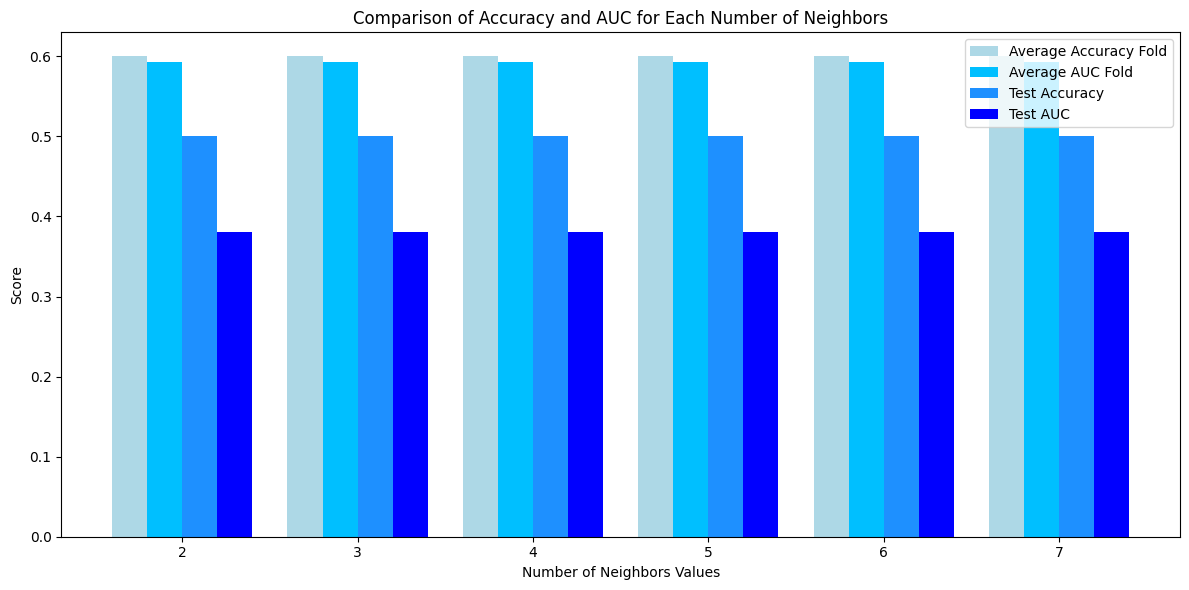

In [110]:
models = [2, 3, 4, 5, 6, 7]
average_accuracy_fold = [0.6]
average_auc_fold = [0.593]
test_accuracy = [0.5]
test_auc = [0.381]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Average Accuracy Fold', color='lightblue')
bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Average AUC Fold', color='deepskyblue')
bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Test Accuracy', color='dodgerblue')
bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='Test AUC', color='blue')

ax.set_xlabel('Number of Neighbors Values')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC for Each Number of Neighbors')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

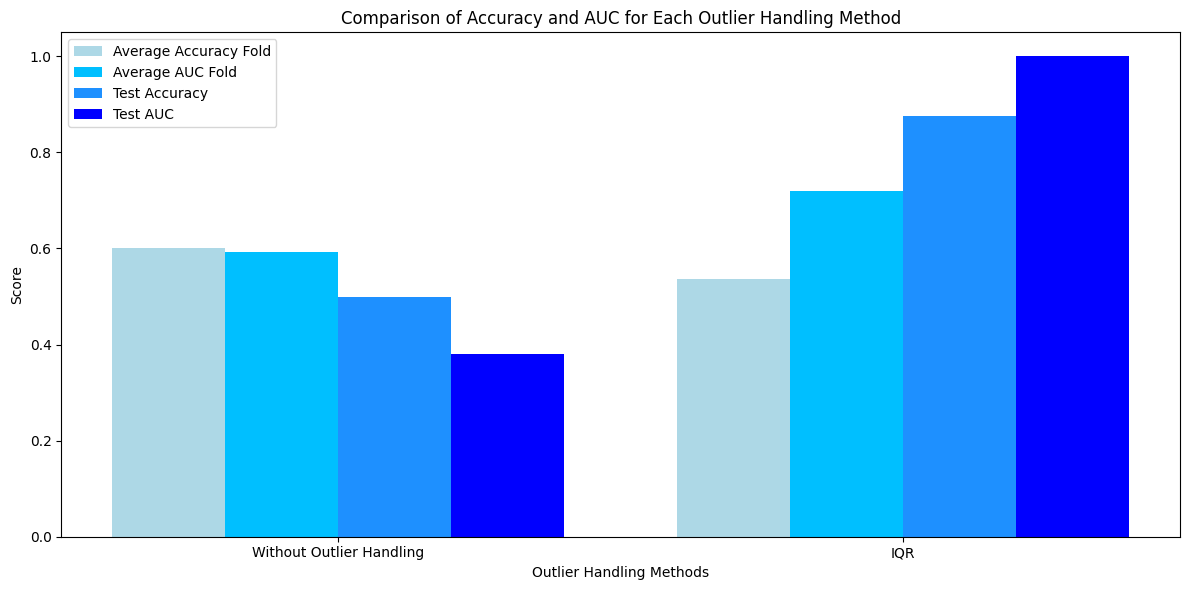

In [111]:
models = ['Without Outlier Handling', 'IQR']
average_accuracy_fold = [0.6, 0.536]
average_auc_fold = [0.593, 0.719]
test_accuracy = [0.5, 0.875]
test_auc = [0.381, 1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Average Accuracy Fold', color='lightblue')
bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Average AUC Fold', color='deepskyblue')
bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Test Accuracy', color='dodgerblue')
bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='Test AUC', color='blue')

ax.set_xlabel('Outlier Handling Methods')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC for Each Outlier Handling Method')

ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

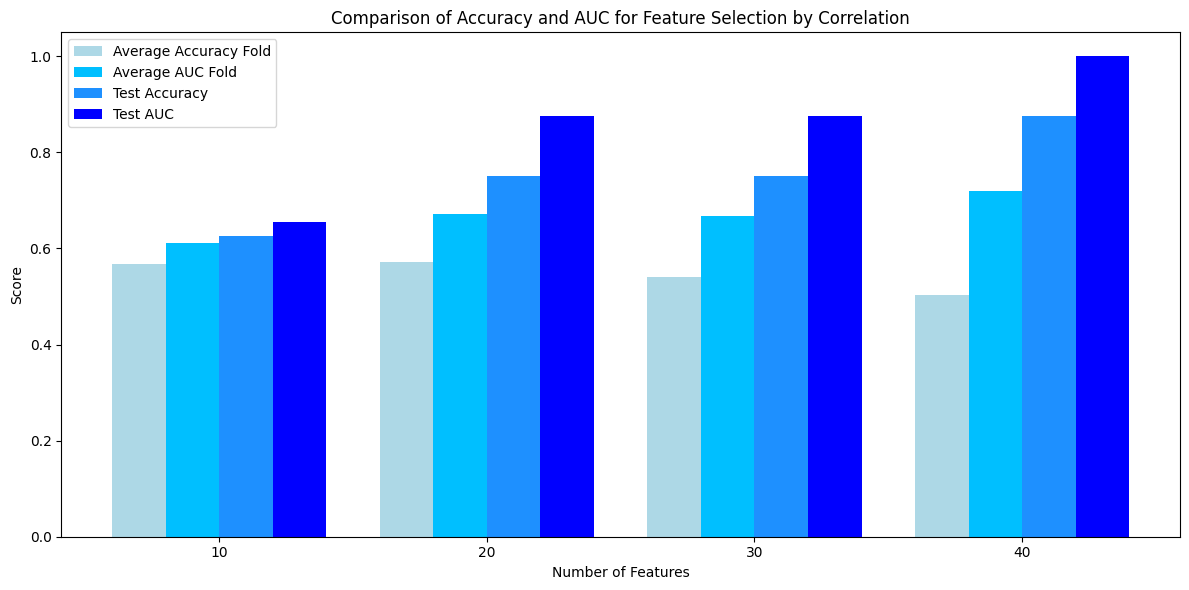

In [112]:
models = [10, 20, 30, 40]
average_accuracy_fold = [0.567, 0.571, 0.54, 0.504]
average_auc_fold = [0.612, 0.672, 0.667, 0.719]
test_accuracy = [0.625, 0.75, 0.75, 0.875]
test_auc = [0.656, 0.875, 0.875, 1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Average Accuracy Fold', color='lightblue')
bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Average AUC Fold', color='deepskyblue')
bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Test Accuracy', color='dodgerblue')
bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='Test AUC', color='blue')

ax.set_xlabel('Number of Features')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC for Feature Selection by Correlation')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

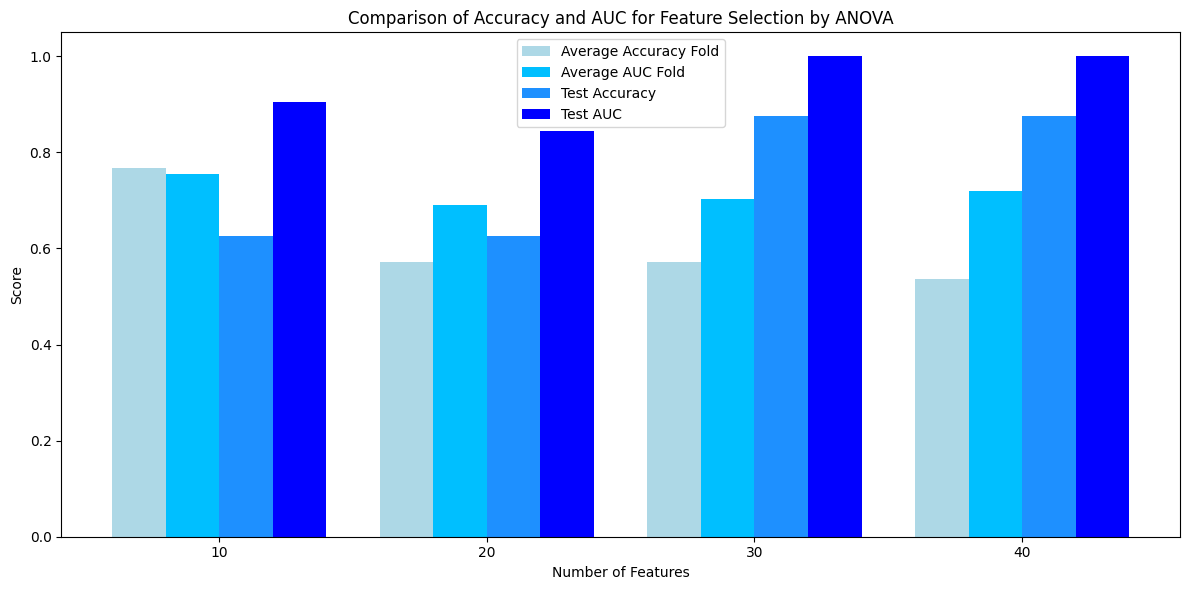

In [113]:
models = [10, 20, 30, 40]
average_accuracy_fold = [0.768, 0.571, 0.571, 0.536]
average_auc_fold = [0.755, 0.69, 0.703, 0.719]
test_accuracy = [0.625, 0.625, 0.875, 0.875]
test_auc = [0.906, 0.844, 1, 1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Average Accuracy Fold', color='lightblue')
bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Average AUC Fold', color='deepskyblue')
bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Test Accuracy', color='dodgerblue')
bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='Test AUC', color='blue')

ax.set_xlabel('Number of Features')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC for Feature Selection by ANOVA')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

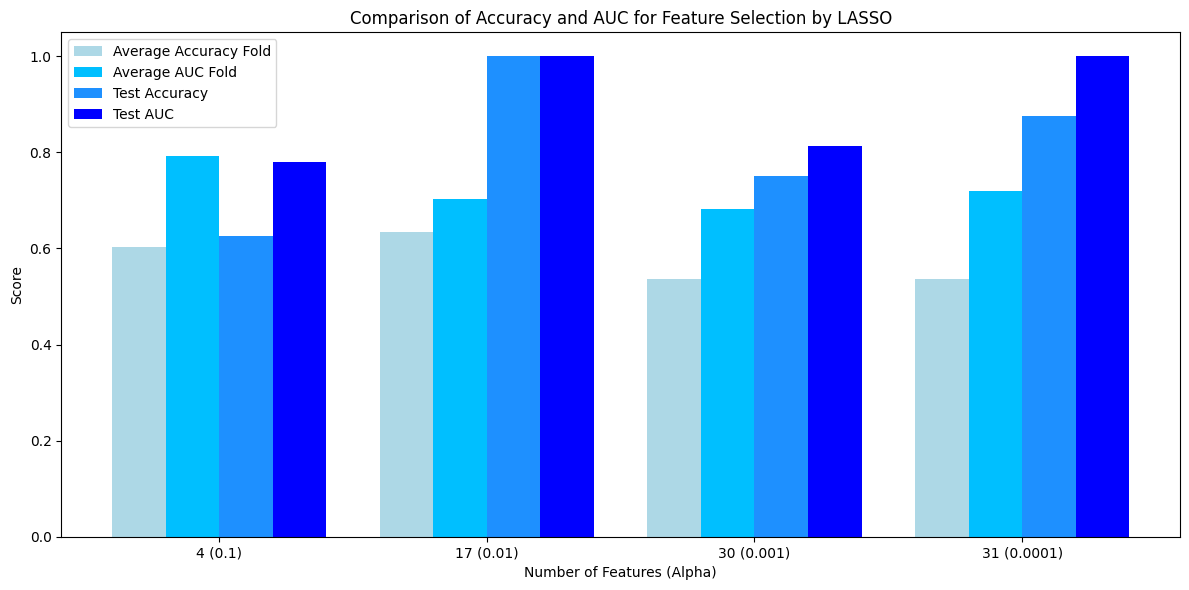

In [114]:
models = ['4 (0.1)', '17 (0.01)', '30 (0.001)', '31 (0.0001)']
average_accuracy_fold = [0.603, 0.634, 0.536, 0.536]
average_auc_fold = [0.792, 0.703, 0.682, 0.719]
test_accuracy = [0.625, 1, 0.75, 0.875]
test_auc = [0.781, 1, 0.813, 1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Average Accuracy Fold', color='lightblue')
bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Average AUC Fold', color='deepskyblue')
bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Test Accuracy', color='dodgerblue')
bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='Test AUC', color='blue')

ax.set_xlabel('Number of Features (Alpha)')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC for Feature Selection by LASSO')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

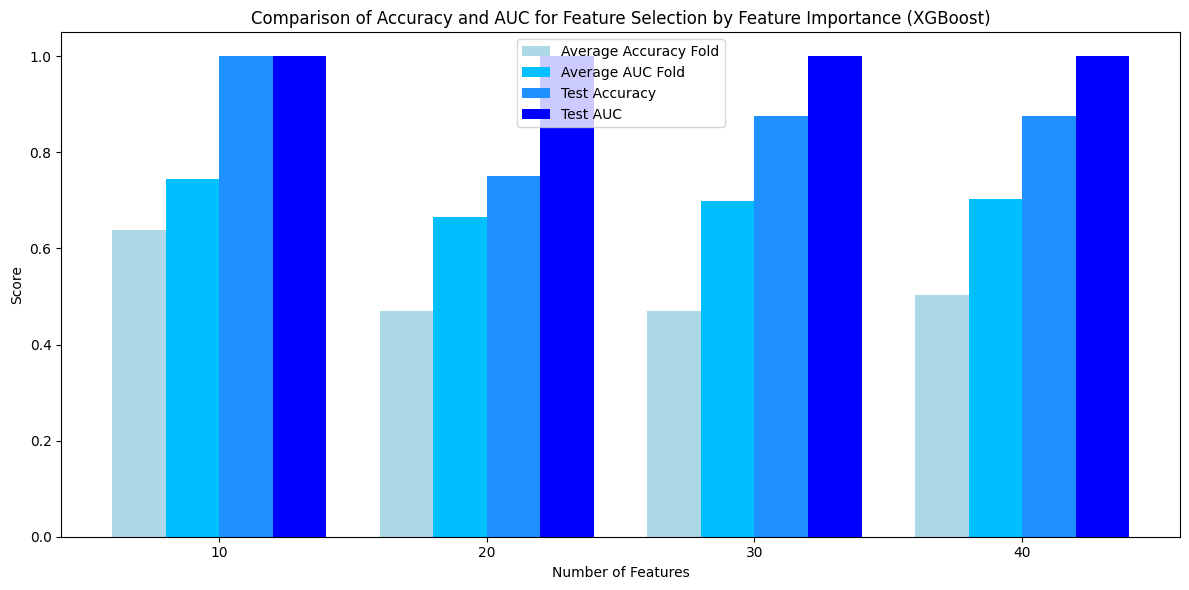

In [115]:
models = [10, 20, 30, 40]
average_accuracy_fold = [0.638, 0.469, 0.469, 0.504]
average_auc_fold = [0.745, 0.666, 0.698, 0.703]
test_accuracy = [1, 0.75, 0.875, 0.875]
test_auc = [1, 1, 1, 1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Average Accuracy Fold', color='lightblue')
bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Average AUC Fold', color='deepskyblue')
bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Test Accuracy', color='dodgerblue')
bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='Test AUC', color='blue')

ax.set_xlabel('Number of Features')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC for Feature Selection by Feature Importance (XGBoost)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

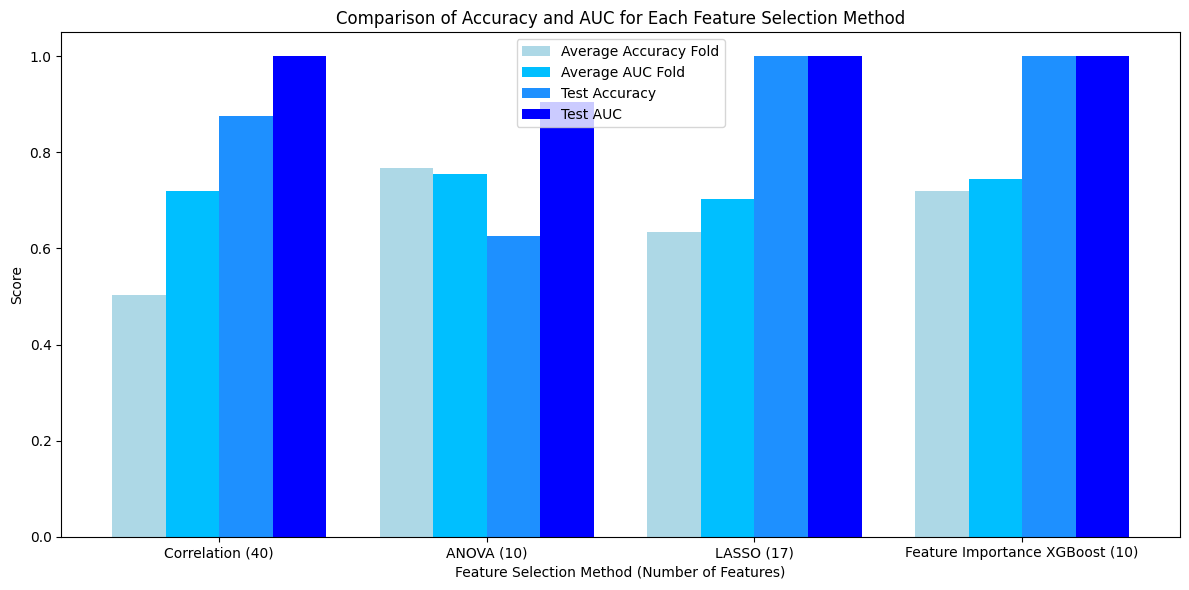

In [116]:
models = ['Correlation (40)', 'ANOVA (10)', 'LASSO (17)', 'Feature Importance XGBoost (10)']
average_accuracy_fold = [0.504, 0.768, 0.634, 0.719]
average_auc_fold = [0.719, 0.755, 0.703, 0.745]
test_accuracy = [0.875, 0.625, 1, 1]
test_auc = [1, 0.906, 1, 1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Average Accuracy Fold', color='lightblue')
bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Average AUC Fold', color='deepskyblue')
bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Test Accuracy', color='dodgerblue')
bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='Test AUC', color='blue')

ax.set_xlabel('Feature Selection Method (Number of Features)')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC for Each Feature Selection Method')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

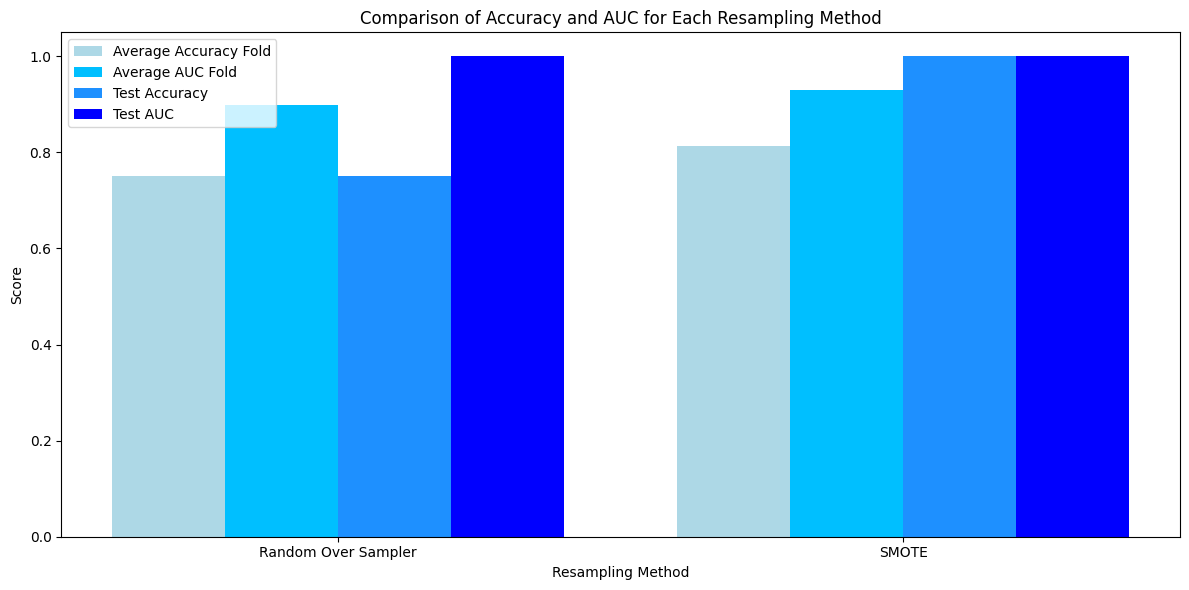

In [117]:
models = ['Random Over Sampler', 'SMOTE']
average_accuracy_fold = [0.75, 0.813]
average_auc_fold = [0.898, 0.93]
test_accuracy = [0.75, 1]
test_auc = [1, 1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Average Accuracy Fold', color='lightblue')
bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Average AUC Fold', color='deepskyblue')
bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Test Accuracy', color='dodgerblue')
bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='Test AUC', color='blue')

ax.set_xlabel('Resampling Method')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC for Each Resampling Method')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

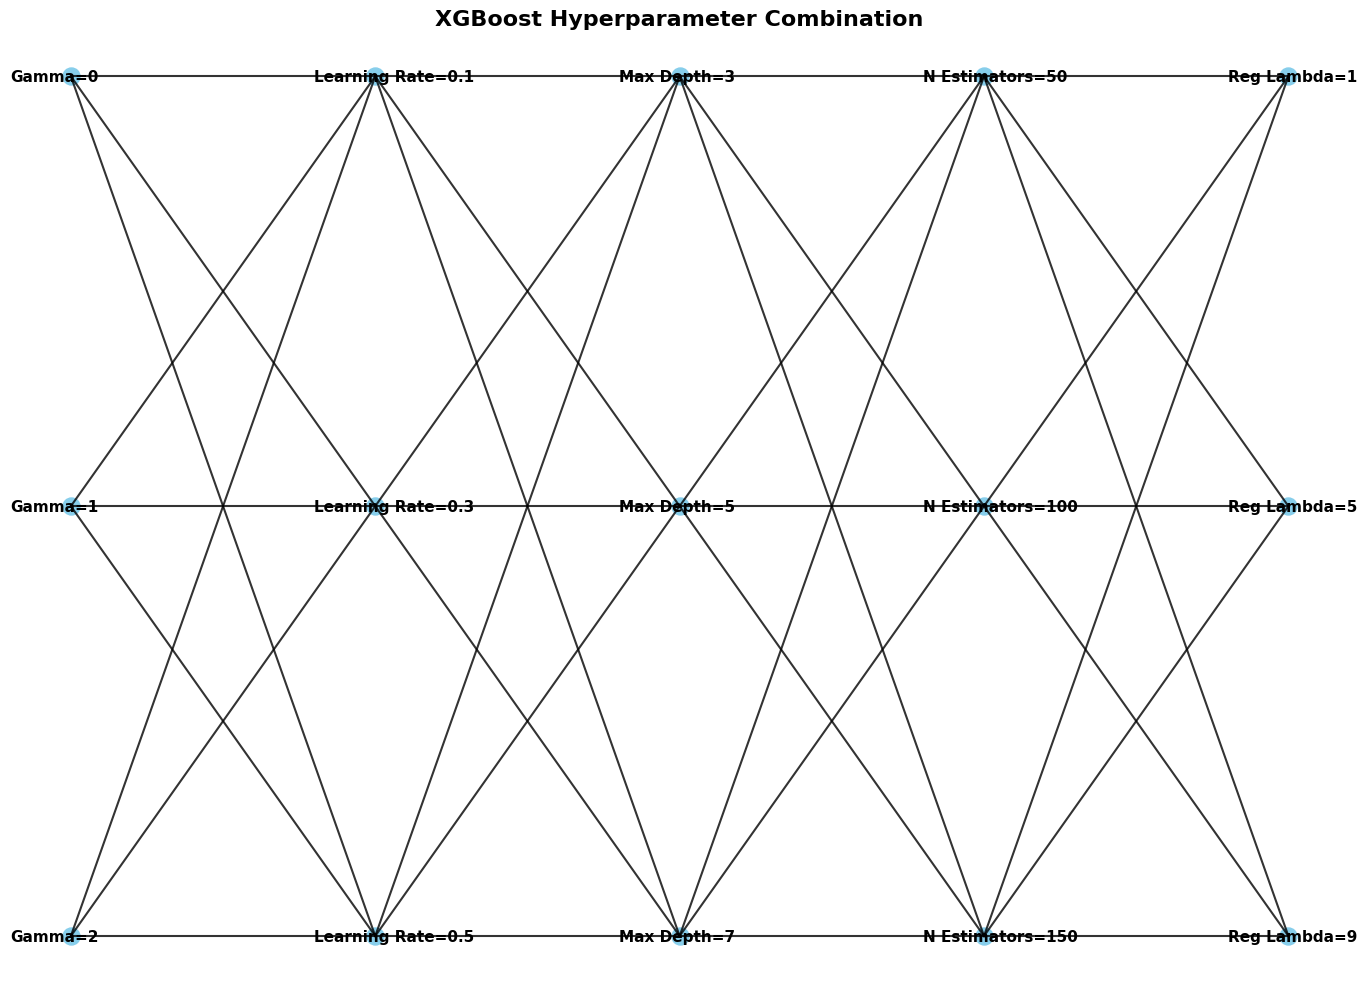

In [118]:
gamma = [0, 1, 2]
learning_rate = [0.1, 0.3, 0.5]
max_depth = [3, 5, 7]
n_estimators = [50, 100, 150]
reg_lambda = [1, 5, 9]

layer_positions = {
    'Gamma': 0,
    'Learning Rate': 1,
    'Max Depth': 2,
    'N Estimators': 3,
    'Reg Lambda': 4
}
layer_names = list(layer_positions.keys())
num_layers = len(layer_names)

node_positions = {
    layer: np.linspace(1, -1, len(eval(layer.lower().replace(' ', '_'))))
    for layer in layer_names
}

fig, ax = plt.subplots(figsize=(14, 10))

for i, (layer, y_positions) in enumerate(node_positions.items()):
    for j, y in enumerate(y_positions):
        ax.scatter(layer_positions[layer], y, s=150, label=f'{layer}={eval(layer.lower().replace(" ", "_"))[j]}' if j == 0 else "", color='skyblue')
        ax.text(layer_positions[layer] - 0.2, y, f'{layer}={eval(layer.lower().replace(" ", "_"))[j]}',
                verticalalignment='center', fontsize=11, weight='bold')

layers = list(node_positions.values())
for i in range(num_layers - 1):
    current_layer = layers[i]
    next_layer = layers[i + 1]
    for y1 in current_layer:
        for y2 in next_layer:
            ax.plot([i, i + 1], [y1, y2], 'k-', alpha=0.8, linewidth=1.5)

ax.set_xticks(list(layer_positions.values()))
ax.set_xticklabels(layer_names, fontsize=14, weight='bold')
ax.set_yticks([])
ax.set_title('XGBoost Hyperparameter Combination', fontsize=16, weight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

In [119]:
# models = ['Naive Bayes', 'LightGBM', 'XGBoost']
# average_accuracy_fold = [0.75, 0.5, 0.844]
# average_auc_fold = [0.781, 0.5, 0.945]
# test_accuracy = [0.75, 0.5, 1]
# test_auc = [0.875, 0.5, 1]

# x = np.arange(len(models))
# width = 0.2

# fig, ax = plt.subplots(figsize=(12, 7))

# bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Rata-Rata Akurasi Fold', color='lightblue')
# bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Rata-Rata AUC Fold', color='deepskyblue')
# bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Akurasi Data Uji', color='dodgerblue')
# bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='AUC Data Uji', color='blue')

# ax.set_xlabel('Model')
# ax.set_ylabel('Skor')
# ax.set_title('Perbandingan Akurasi dan AUC Setiap Model')
# ax.set_xticks(x)
# ax.set_xticklabels(models)
# ax.legend()

# plt.tight_layout()
# plt.show()

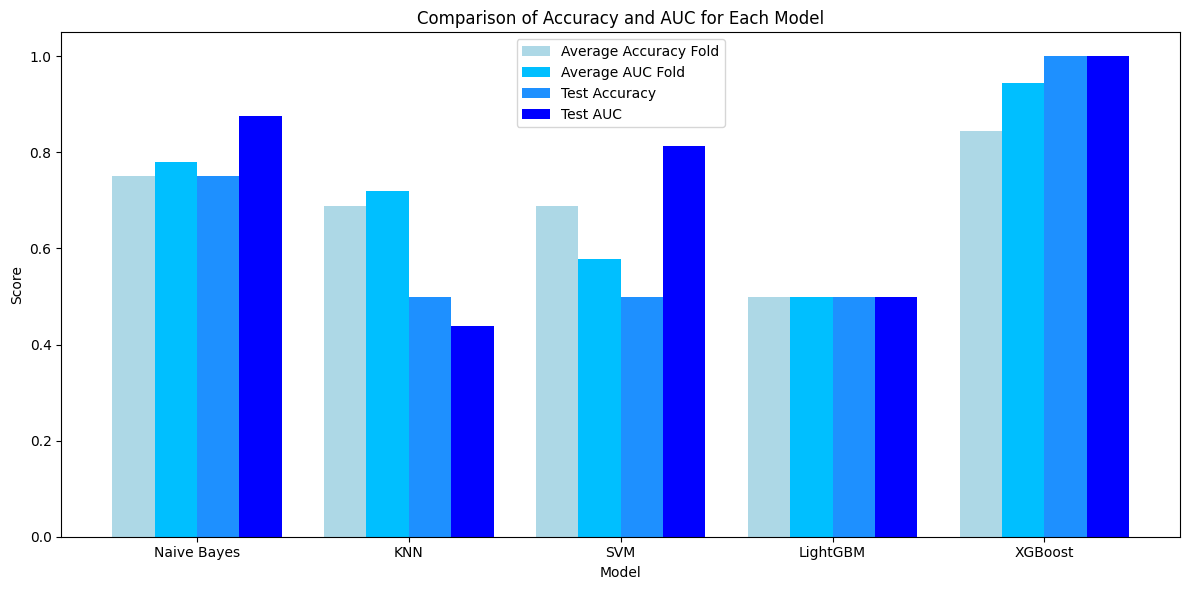

In [120]:
models = ['Naive Bayes', 'KNN', 'SVM', 'LightGBM', 'XGBoost']
average_accuracy_fold = [0.75, 0.688, 0.688, 0.5, 0.844]
average_auc_fold = [0.781, 0.719, 0.578, 0.5, 0.945]
test_accuracy = [0.75, 0.5, 0.5, 0.5, 1]
test_auc = [0.875, 0.438, 0.813, 0.5, 1]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - 1.5 * width, average_accuracy_fold, width, label='Average Accuracy Fold', color='lightblue')
bar2 = ax.bar(x - 0.5 * width, average_auc_fold, width, label='Average AUC Fold', color='deepskyblue')
bar3 = ax.bar(x + 0.5 * width, test_accuracy, width, label='Test Accuracy', color='dodgerblue')
bar4 = ax.bar(x + 1.5 * width, test_auc, width, label='Test AUC', color='blue')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()

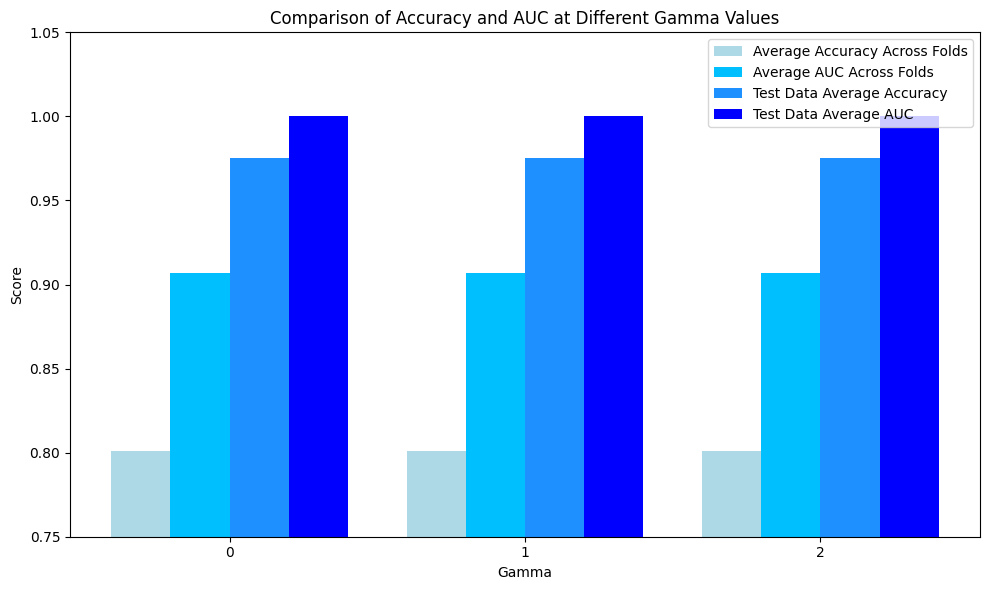

In [121]:
gamma_values = ['0', '1', '2']
average_accuracy_fold = [0.801, 0.801, 0.801]
average_auc_fold = [0.907, 0.907, 0.907]
test_accuracy = [0.975, 0.975, 0.975]
test_auc = [1.000, 1.000, 1.000]

bar_width = 0.2
x = np.arange(len(gamma_values))

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * bar_width, average_accuracy_fold, bar_width, label='Average Accuracy Across Folds', color='lightblue')
plt.bar(x - 0.5 * bar_width, average_auc_fold, bar_width, label='Average AUC Across Folds', color='deepskyblue')
plt.bar(x + 0.5 * bar_width, test_accuracy, bar_width, label='Test Data Average Accuracy', color='dodgerblue')
plt.bar(x + 1.5 * bar_width, test_auc, bar_width, label='Test Data Average AUC', color='blue')

plt.xlabel('Gamma')
plt.ylabel('Score')
plt.title('Comparison of Accuracy and AUC at Different Gamma Values')
plt.xticks(x, gamma_values)
plt.ylim(0.75, 1.05)
plt.legend()

plt.tight_layout()
plt.show()

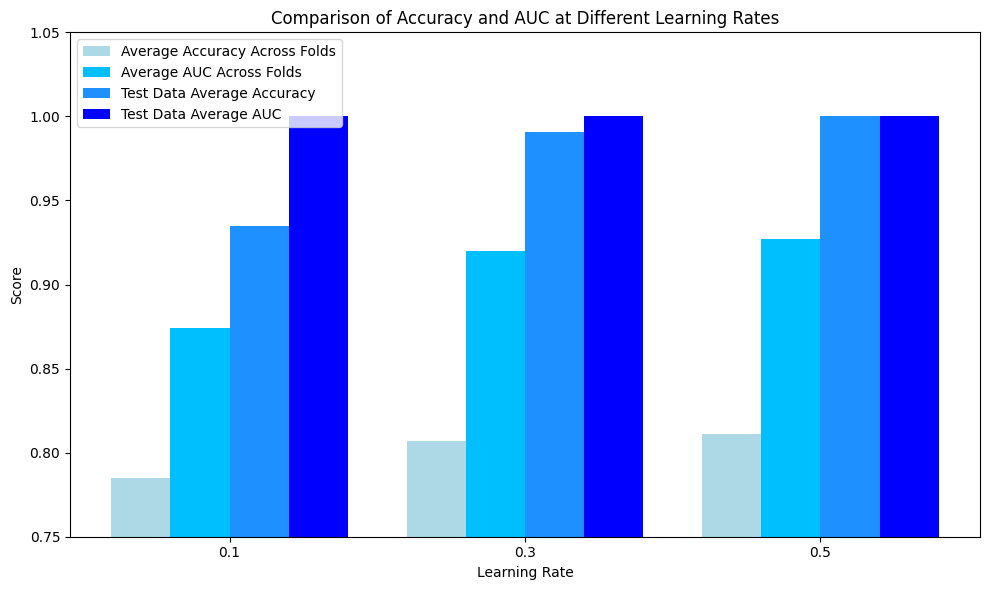

In [122]:
learning_rates = ['0.1', '0.3', '0.5']
average_accuracy_fold = [0.785, 0.807, 0.811]
average_auc_fold = [0.874, 0.920, 0.927]
test_accuracy = [0.935, 0.991, 1.000]
test_auc = [1.000, 1.000, 1.000]

bar_width = 0.2
x = np.arange(len(learning_rates))

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * bar_width, average_accuracy_fold, bar_width, label='Average Accuracy Across Folds', color='lightblue')
plt.bar(x - 0.5 * bar_width, average_auc_fold, bar_width, label='Average AUC Across Folds', color='deepskyblue')
plt.bar(x + 0.5 * bar_width, test_accuracy, bar_width, label='Test Data Average Accuracy', color='dodgerblue')
plt.bar(x + 1.5 * bar_width, test_auc, bar_width, label='Test Data Average AUC', color='blue')

plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('Comparison of Accuracy and AUC at Different Learning Rates')
plt.xticks(x, learning_rates)
plt.ylim(0.75, 1.05)
plt.legend()

plt.tight_layout()
plt.show()

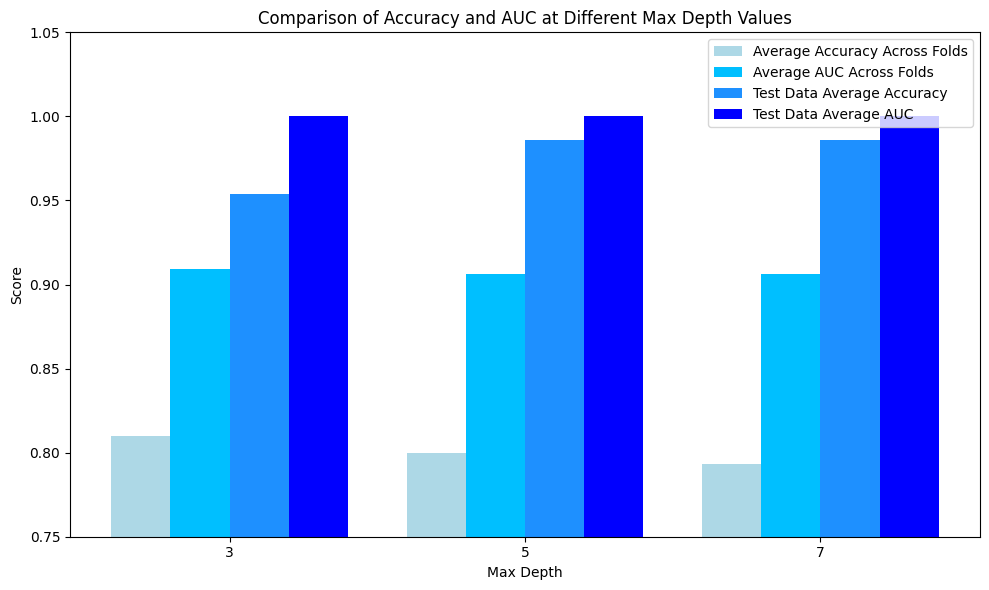

In [123]:
max_depth_values = ['3', '5', '7']
average_accuracy_fold = [0.810, 0.800, 0.793]
average_auc_fold = [0.909, 0.906, 0.906]
test_accuracy = [0.954, 0.986, 0.986]
test_auc = [1.000, 1.000, 1.000]

bar_width = 0.2
x = np.arange(len(max_depth_values))

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * bar_width, average_accuracy_fold, bar_width, label='Average Accuracy Across Folds', color='lightblue')
plt.bar(x - 0.5 * bar_width, average_auc_fold, bar_width, label='Average AUC Across Folds', color='deepskyblue')
plt.bar(x + 0.5 * bar_width, test_accuracy, bar_width, label='Test Data Average Accuracy', color='dodgerblue')
plt.bar(x + 1.5 * bar_width, test_auc, bar_width, label='Test Data Average AUC', color='blue')

plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.title('Comparison of Accuracy and AUC at Different Max Depth Values')
plt.xticks(x, max_depth_values)
plt.ylim(0.75, 1.05)
plt.legend()

plt.tight_layout()
plt.show()

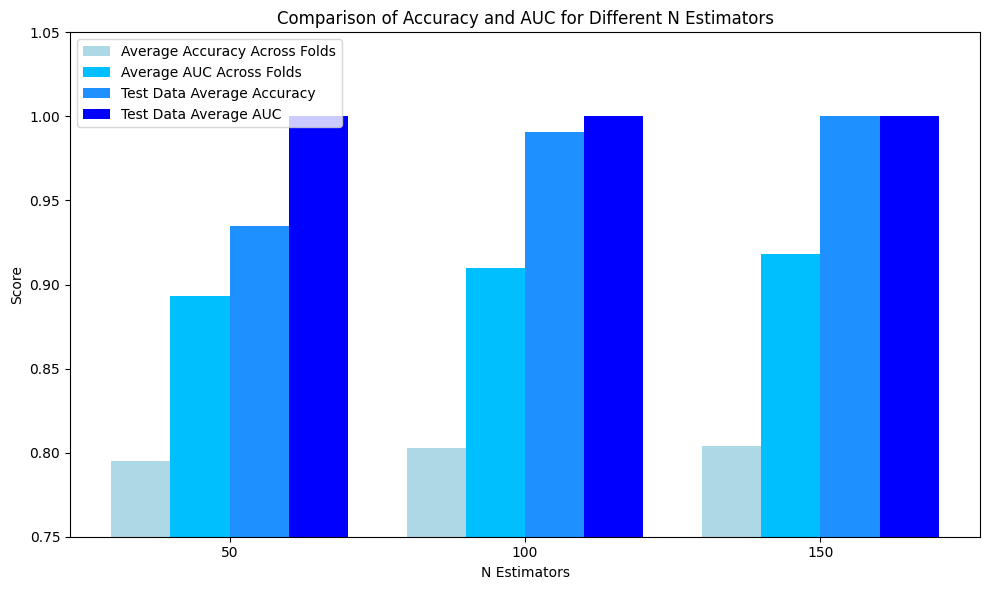

In [124]:
n_estimators = ['50', '100', '150']
average_accuracy_fold = [0.795, 0.803, 0.804]
average_auc_fold = [0.893, 0.910, 0.918]
test_accuracy = [0.935, 0.991, 1.000]
test_auc = [1.000, 1.000, 1.000]

bar_width = 0.2
x = np.arange(len(n_estimators))

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * bar_width, average_accuracy_fold, bar_width, label='Average Accuracy Across Folds', color='lightblue')
plt.bar(x - 0.5 * bar_width, average_auc_fold, bar_width, label='Average AUC Across Folds', color='deepskyblue')
plt.bar(x + 0.5 * bar_width, test_accuracy, bar_width, label='Test Data Average Accuracy', color='dodgerblue')
plt.bar(x + 1.5 * bar_width, test_auc, bar_width, label='Test Data Average AUC', color='blue')

plt.xlabel('N Estimators')
plt.ylabel('Score')
plt.title('Comparison of Accuracy and AUC for Different N Estimators')
plt.xticks(x, n_estimators)
plt.ylim(0.75, 1.05)
plt.legend()

plt.tight_layout()
plt.show()

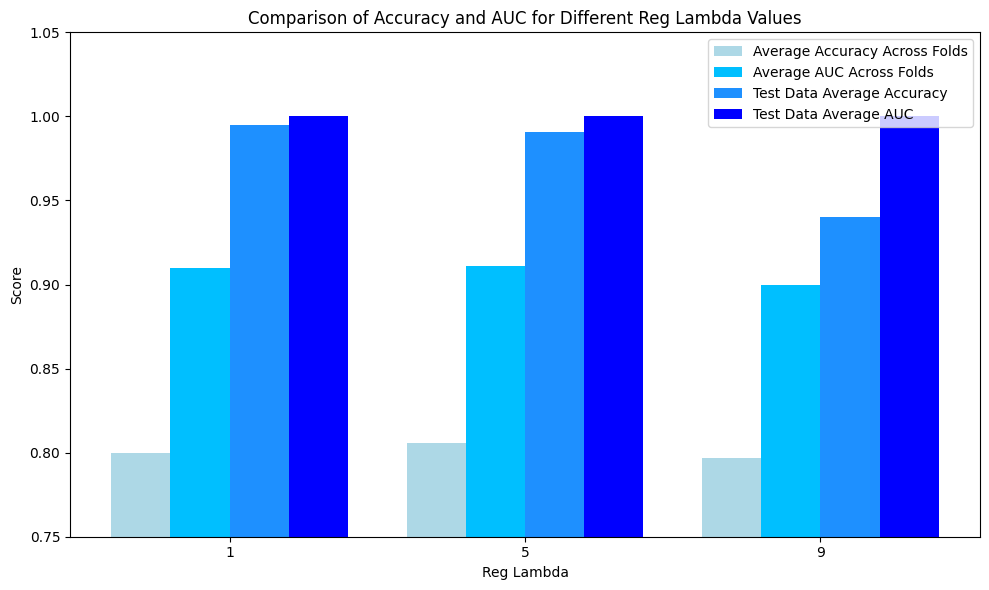

In [125]:
reg_lambda_values = ['1', '5', '9']
average_accuracy_fold = [0.800, 0.806, 0.797]
average_auc_fold = [0.910, 0.911, 0.900]
test_accuracy = [0.995, 0.991, 0.940]
test_auc = [1.000, 1.000, 1.000]

bar_width = 0.2
x = np.arange(len(reg_lambda_values))

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * bar_width, average_accuracy_fold, bar_width, label='Average Accuracy Across Folds', color='lightblue')
plt.bar(x - 0.5 * bar_width, average_auc_fold, bar_width, label='Average AUC Across Folds', color='deepskyblue')
plt.bar(x + 0.5 * bar_width, test_accuracy, bar_width, label='Test Data Average Accuracy', color='dodgerblue')
plt.bar(x + 1.5 * bar_width, test_auc, bar_width, label='Test Data Average AUC', color='blue')

plt.xlabel('Reg Lambda')
plt.ylabel('Score')
plt.title('Comparison of Accuracy and AUC for Different Reg Lambda Values')
plt.xticks(x, reg_lambda_values)
plt.ylim(0.75, 1.05)
plt.legend()

plt.tight_layout()
plt.show()

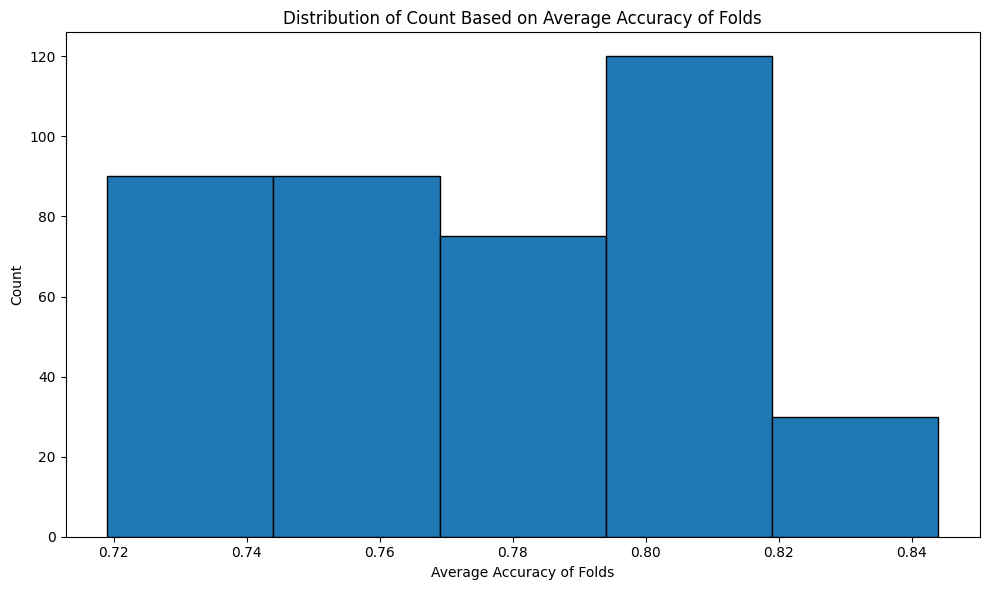

In [126]:
accuracy_fold = [0.719, 0.75, 0.781, 0.813, 0.844]
count = [90, 90, 75, 120, 30]

plt.figure(figsize=(10, 6))

plt.hist(accuracy_fold, weights=count, bins=len(accuracy_fold), edgecolor='black')

plt.xlabel('Average Accuracy of Folds')
plt.ylabel('Count')
plt.title('Distribution of Count Based on Average Accuracy of Folds')

plt.tight_layout()
plt.show()

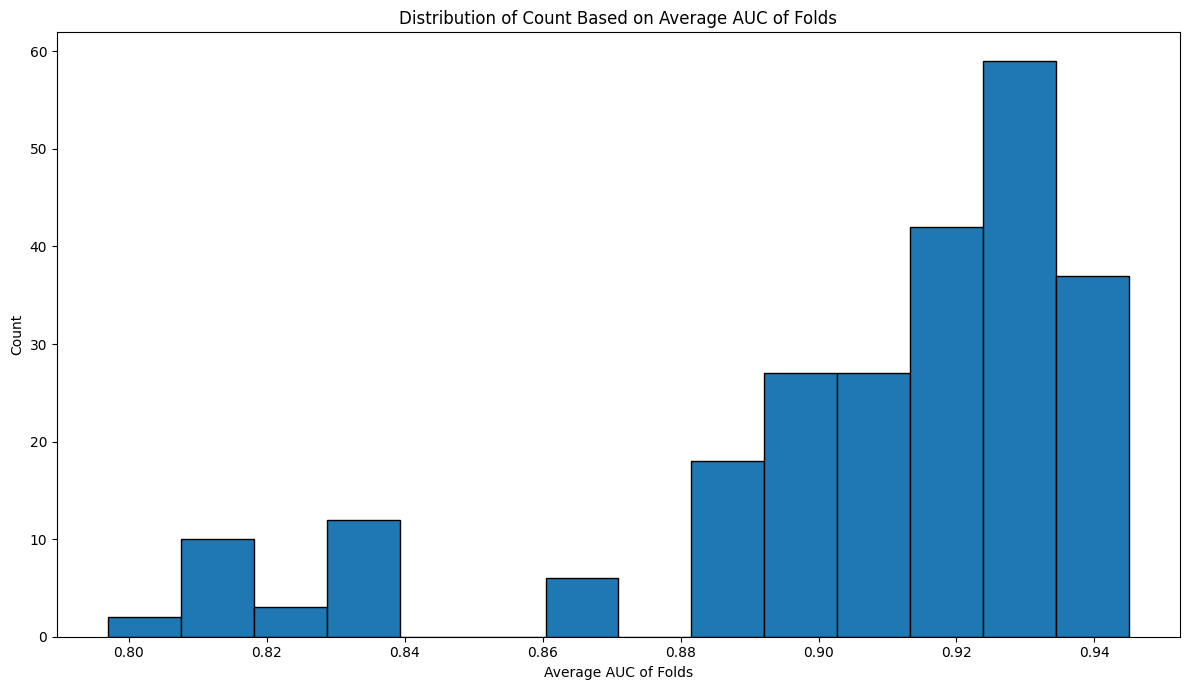

In [127]:
auc_fold = [0.797, 0.813, 0.828, 0.836, 0.867, 0.883, 0.891, 0.898, 0.906, 0.914, 0.922, 0.930, 0.938, 0.945]
count = [2, 10, 3, 12, 6, 6, 12, 27, 27, 3, 39, 59, 34, 3]

plt.figure(figsize=(12, 7))

plt.hist(auc_fold, bins=len(auc_fold), weights=count, edgecolor='black')

plt.xlabel('Average AUC of Folds')
plt.ylabel('Count')
plt.title('Distribution of Count Based on Average AUC of Folds')

plt.tight_layout()
plt.show()

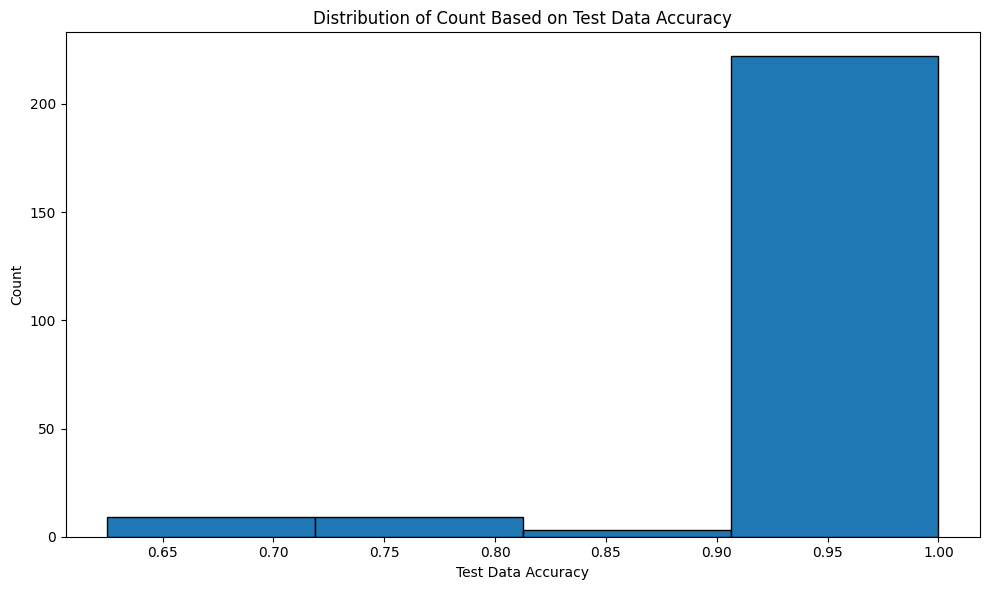

In [128]:
test_accuracy = [0.625, 0.75, 0.875, 1]
count = [9, 9, 3, 222]

plt.figure(figsize=(10, 6))

plt.hist(test_accuracy, bins=len(test_accuracy), weights=count, edgecolor='black')

plt.xlabel('Test Data Accuracy')
plt.ylabel('Count')
plt.title('Distribution of Count Based on Test Data Accuracy')

plt.tight_layout()
plt.show()

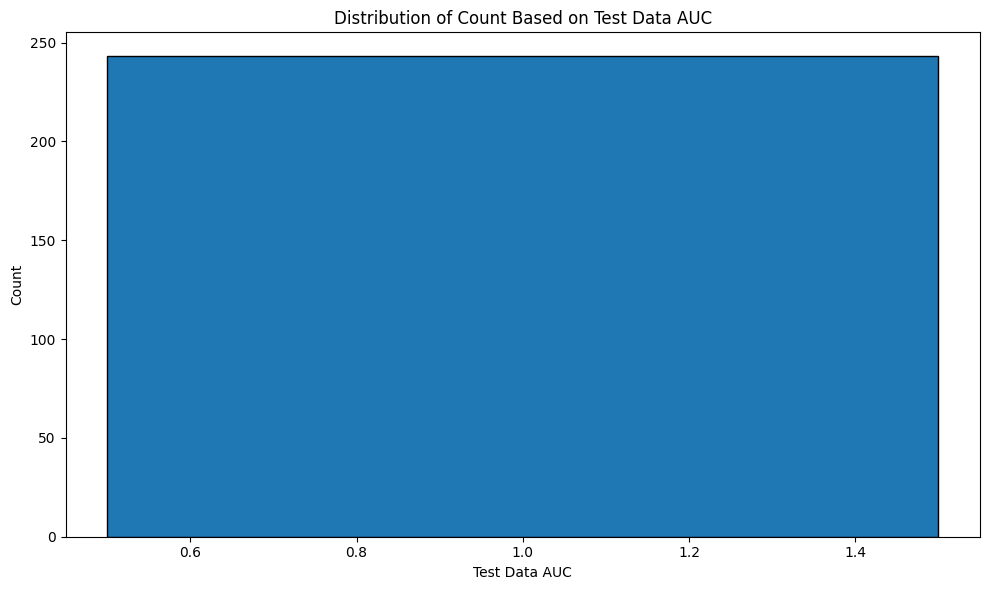

In [129]:
test_auc = [1]
count = [243]

plt.figure(figsize=(10, 6))

plt.hist(test_auc, bins=1, weights=count, edgecolor='black')

plt.xlabel('Test Data AUC')
plt.ylabel('Count')
plt.title('Distribution of Count Based on Test Data AUC')

plt.tight_layout()
plt.show()